<a href="https://colab.research.google.com/github/Seogury/cp2_team3/blob/main/CP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [365]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/2019-Oct.csv')

In [ ]:
#데이터 확인
df.head(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c


In [ ]:
df.shape

(42448764, 9)

In [ ]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [ ]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [366]:
df.dropna(subset = ['category_code'],inplace = True)

In [ ]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code          0
brand            2372533
price                  0
user_id                0
user_session           2
dtype: int64

In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
...,...,...,...,...,...,...,...,...,...
42448757,2019-10-31 23:59:58 UTC,view,1004870,2053013555631882655,electronics.smartphone,samsung,275.25,518956209,6764041a-9285-4869-8a32-a79adf31d212
42448758,2019-10-31 23:59:58 UTC,view,2702331,2053013563911439225,appliances.kitchen.refrigerators,lg,527.43,524356542,153f9818-4d32-4e8b-ba9f-f355094e8ae4
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28933155 entries, 1 to 42448762
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.2+ GB


In [ ]:
df.event_type

1           view
2           view
3           view
4           view
5           view
            ... 
42448757    view
42448758    view
42448759    view
42448761    view
42448762    view
Name: event_type, Length: 28933155, dtype: object

In [367]:
#event_type labeling
mapping = {'view':1, 'cart':2, 'purchase': 3}
df['event_type'] = df.event_type.map(mapping)

In [ ]:
# df['brand']#[df['brand']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['user_session']=encoder.fit_transform(df['user_session'])

In [ ]:
# df.to_csv('oct_small.csv')

## 카테고리 나누기

In [368]:
#카테고리 나누기
df['category_code_split']=df['category_code'].apply(lambda x : x.split('.'))

In [369]:
#대분류, 중분류
df['main_category'] = [x[0] for x in df['category_code_split']]
df['middle_category'] = [x[1] for x in df['category_code_split']]

In [370]:
#소분류
sub_list = []
for x in df['category_code_split']:
  try:
    sub_list.append(x[2])
  except:
    sub_list.append(None)

In [371]:
df['sub_category'] = sub_list

In [372]:
df.drop('category_code_split',axis = 1,inplace = True)

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,middle_category,sub_category
1,2019-10-01 00:00:00 UTC,1,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,3885993,appliances,environment,water_heater
2,2019-10-01 00:00:01 UTC,1,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,2280166,furniture,living_room,sofa
3,2019-10-01 00:00:01 UTC,1,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,3288775,computers,notebook,None
4,2019-10-01 00:00:04 UTC,1,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,5247018,electronics,smartphone,None
5,2019-10-01 00:00:05 UTC,1,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,344058,computers,desktop,None


# 분석

## 문자 → 시간열

In [ ]:
from datetime import datetime, timedelta, timezone

df['event_time']=pd.to_datetime(df['event_time'])#.datetime.tz_convert(None)
#시간대 설정
timezone_dubai = timezone(timedelta(hours=4))
df['event_time'] = df['event_time'].apply(lambda x : x.astimezone(timezone_dubai))

In [ ]:
df['month'] = df['event_time'].dt.month
df['day'] = df['event_time'].dt.day
df['week'] = df['event_time'].dt.dayofweek

## 카테고리별 판매 전환율

In [ ]:
df['category_code'] = df['category_code'].apply(lambda x  : str(x))

In [ ]:
import matplotlib.pyplot as plt

#electronics.smartphone 338018/742849
view_count = df['category_code'].value_counts()
buy_count = df[df['event_type']=='purchase']['category_code'].value_counts()


In [ ]:
view_count = view_count.reset_index()

In [ ]:
buy_list = []
for i in buy_count.reset_index()['index']:
    buy_list.append(i)

b_count = []
for i in buy_count.reset_index()['category_code']:
  b_count.append(i)

df_cat = pd.DataFrame()

df_cat['category'] = buy_list
df_cat['purchase_count'] = b_count

In [ ]:
view_count.rename(columns = {'index': 'category'},inplace=True)

In [ ]:
view_count

In [ ]:
df_cat = pd.merge(df_cat,view_count,how='outer',on='category')

In [ ]:
df_cat.rename(columns = {'category_code': 'total_count'},inplace=True)

In [ ]:
df_cat = df_cat.fillna(0)

In [ ]:
df_cat['c_rate'] = df_cat['purchase_count']/df_cat['total_count']

In [ ]:
df_cat_sort = df_cat.sort_values('c_rate',ascending = False)

<Figure size 10800x10800 with 0 Axes>

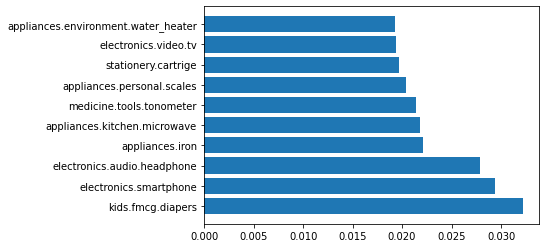

<Figure size 10800x10800 with 0 Axes>

In [ ]:
plt.barh(df_cat_sort['category'][0:10],df_cat_sort['c_rate'][0:10])
plt.figure(figsize=(150,150))

In [ ]:
df_cat_sort.to_csv('category_conversion_rate.csv')

In [ ]:
#데이터 타입 확인
df.dtypes

event_time       datetime64[ns, UTC+04:00]
event_type                          object
product_id                           int64
category_id                          int64
category_code                       object
brand                               object
price                              float64
user_id                              int64
user_session                        object
dtype: object

##전자제품 세션 유지 시간 별 판매(실패)


In [ ]:
df_ele = df[df['main_category']=='electronics']

In [ ]:
df_ele2 = df_ele.copy()

In [ ]:
df_ele2.drop(['category_code', 'product_id', 'brand', 'middle_category', 'sub_category', 'user_id', 'category_id'], axis = 1, inplace = True)

In [ ]:
df_ele2

In [ ]:
#세션 가져오기
session_list = []
for i in df_ele2['user_session']:
    session_list.append(i)

In [ ]:
len(session_list)

15838948

In [ ]:
#중복값 제거
session_set = set(session_list)
session_list = list(session_set) 

In [ ]:
len(session_list)

4185225

###실패
1. (일 * 24 * 60) + (시 * 60) + 분 데이터 사용량이 많아서 램 세션 종료

In [ ]:
#타임 데이터 나누기
df_ele['event_time_split'] = df_ele['event_time'].apply(lambda x : x.split(' '))
df_ele['day'] = [x[0] for x in df_ele['event_time_split']]
df_ele['time'] = [x[1] for x in df_ele['event_time_split']]
#df_ele['min'] = df_ele['event_time'][2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_ele.drop('event_time_split', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_ele['day_split'] = df_ele['day'].apply(lambda x : x.split('-'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_ele.drop('day', axis = 1, inplace = True)  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_ele.drop(['category_id','category_code','brand','main_category','middle_category','sub_category'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_ele.drop('event_time',axis = 1 , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_ele.to_csv('ele.csv')

### 실패
1. 너무 오래 걸림 (데이터량이 많음)
2. 데이터가 적으면 없음



In [ ]:
from datetime import datetime, timedelta, timezone

#문자열 → 시간
df_ele2['event_time']=pd.to_datetime(df_ele2['event_time'])

#시간대 설정
timezone_dubai = timezone(timedelta(hours=4))
df_ele2['event_time'] = df_ele2['event_time'].apply(lambda x : x.astimezone(timezone_dubai))

In [ ]:
#세션별 시간
import random

time_list = []
count = 0
ran_session = random.sample(session_list,1000)
for i in ran_session:
    if len(df_ele2[df_ele2['user_session']== f'{i}']['event_type']) > 1:
        time = df_ele2[df_ele2['user_session']== f'{i}'].iloc[-1][0] - df_ele2[df_ele2['user_session']== f'{i}'].iloc[1][0]
        time_list.append(time)
        count += 1
        rate = count/len(ran_session)
        print(rate)
    else:
        time = 0
        time_list.append(time)
        count += 1
        rate = count/len(ran_session)
        print(rate)

In [ ]:
pur_list = []
count = 0

for i in ran_session:
    pur = df_ele2[df_ele2['user_session']== f'{i}']['event_type']
    if 'purchase' in pur:
      pur_list.append(1)
      count += 1
      rate = count/len(ran_session)
      print(rate)
    else:
      pur_list.append(0)
      count += 1
      rate = count/len(ran_session)
      print(rate)

In [ ]:
df_se = pd.DataFrame()
df_se['time'] = time_list
df_se['session'] = ran_session
df_se['purchase'] = pur_list

In [ ]:
count = 0
for i in df_se['purchase']:
  if i == 1:
    count += 1
    print(count)

## 카트에 담긴 물건이 구매까지 이어지는가? (카테고리별) → 진행예정
 

In [ ]:
df_cart = df[df['event_type'] == 2]
df_cart = df_cart[['user_id','product_id','main_category']]

count = 0
cart_pur_list = []
for i,z in zip(df_cart['user_id'],df_cart['product_id']):
  x = df[df['user_id'] == i]
  y = x[x['event_type'] == 3]['product_id']
  y_list = []
  count += 1
  print(count/len(df_cart))
  for i in y:
    y_list.append(i)
  if z in y_list:
    cart_pur_list.append(1)
  else :
    cart_pur_list.append(0)


In [ ]:
len(df_cart)

809407

In [ ]:
x = df[df['user_id'] == 542774966]

In [ ]:
y = x[x['event_type'] == 'purchase']['product_id']
purchase_list = []
for i in y:
  purchase_list.append(i)

In [ ]:
purchase_list

NameError: ignored

In [ ]:
x['event_type']

TypeError: ignored

In [ ]:
len(cart_pur_list)

809407

In [ ]:
df_cart['purchase'] = cart_pur_list

In [ ]:
df_cart.to_csv('cart.csv')

In [ ]:
df_cart['purchase'] = df_cart['purchase'].apply(lambda x : str(x))

In [ ]:
df_cart

,user_id,product_id,main_category,purchase
583,524325294,1002524,electronics,1
680,533624186,4804056,electronics,1
1325,536415846,1004833,electronics,1
1654,513632293,1005003,electronics,1
1684,555110488,1004750,electronics,1
...,...,...,...,...
42447907,542774966,1004767,electronics,1
42448124,566280291,1005134,electronics,0
42448135,566280291,1005134,electronics,0
42448156,512717356,1003306,electronics,1


In [ ]:
cart_pur = df_cart[df_cart['purchase']==1].value_counts('main_category').reset_index().rename(columns = {0:'pur_count'})
cart_no = df_cart[df_cart['purchase']==0].value_counts('main_category').reset_index().rename(columns = {0:'no_count'})

In [ ]:
cart_count = pd.merge(cart_pur,cart_no)

In [ ]:
cart_count['rate'] = cart_count['pur_count']/(cart_count['pur_count']+cart_count['no_count'])

In [ ]:
cart_count_rate = cart_count.sort_values('rate',ascending = False)

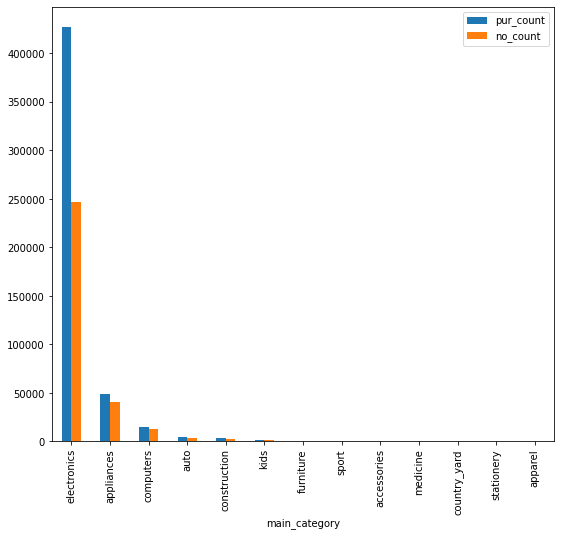

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cat_list = []
for i in cart_count['main_category']:
  cat_list.append(i)

cart_count.plot(x="main_category", y=["pur_count", "no_count"], kind="bar",figsize=(9,8))
plt.show()



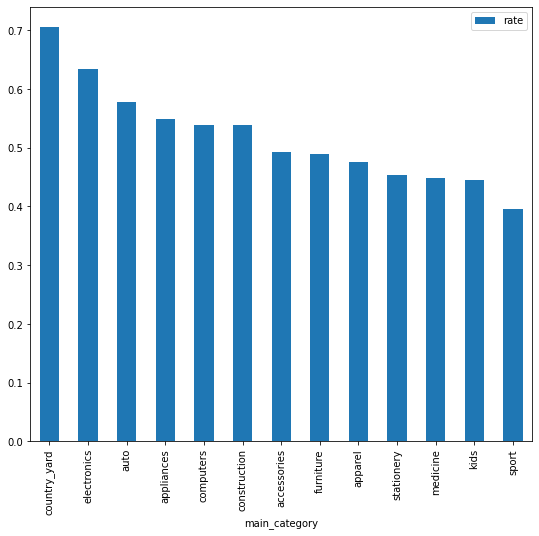

In [ ]:
cart_count_rate.plot(x="main_category", y=["rate"], kind="bar",figsize=(9,8))

##구매된 세션 시간은 얼마나 걸림? (카테고리 별)

In [ ]:
#1 카테고리 설정
category_list = []
for i in df['main_category']:
  category_list.append(i)
category_set = set(category_list)
category_list = list(category_set)


In [ ]:
print(category_list)

['appliances', 'medicine', 'apparel', 'construction', 'furniture', 'kids', 'accessories', 'sport', 'auto', 'stationery', 'computers', 'country_yard', 'electronics']


In [ ]:
# #2 구매된 세션 찾기
# for i in category_list:
#   x = df[df['main_category']==f'{i}']
#   y = x[x['event_type']=='purchase']
#   session_list = []
#   for i in y['user_session']:
#     session_list.append(i)
#   session_list = list(set(session_list))
#   for i in session_list:
#     y[y['session'] == f'{i}']

In [ ]:
#구매 데이터 560000개 
df[df['event_type']==3].value_counts('main_category').head(5)

main_category
electronics    420361
appliances      71231
computers       27151
auto             7869
apparel          6152
dtype: int64

In [ ]:
pur_df = df[df['event_type']==3]

In [ ]:
pur_df

In [ ]:
#electronic
pur_ele = pur_df[pur_df['main_category']=='electronics']
#appliances
pur_app = pur_df[pur_df['main_category']=='appliances']
#computers:
pur_com = pur_df[pur_df['main_category']=='computers']
pur_auto = pur_df[pur_df['main_category']=='auto']
pur_apparel = pur_df[pur_df['main_category']=='apparel']

In [ ]:
ele_session = []
for i in pur_ele['user_session']:
    ele_session.append(i)
    
app_session = []
for i in pur_app['user_session']:
    app_session.append(i)

com_session = []
for i in pur_com['user_session']:
    com_session.append(i)

auto_session = []
for i in pur_auto['user_session']:
    auto_session.append(i)

apparel_session = []
for i in pur_apparel['user_session']:
    apparel_session.append(i)

In [ ]:
def reduplication(x):
  x = list(set(x))
  return x

ele_session = reduplication(ele_session)
app_session = reduplication(app_session)
com_session = reduplication(com_session)

In [ ]:
len(apparel_session)

6152

###전자 제품

In [ ]:
import random

ele_time = []
count = 0
session = random.sample(ele_session,1000)

for i in session:
    x = df[df['user_session'] == f'{i}']
    if len(x['event_type']) > 1:
        time = df[df['user_session']== f'{i}'].iloc[-1][0] - df[df['user_session']== f'{i}'].iloc[1][0]
        ele_time.append(time)
        count += 1
        rate = count/len(session)
        print(rate)
    else:
        time = 0
        ele_time.append(time)
        count += 1
        rate = count/len(session)
        print(rate)

In [ ]:
ele_df = pd.DataFrame()
ele_df['session'] = session
ele_df['time'] = ele_time

In [ ]:
ele_df['time'] = ele_df['time'].astype(str)
ele_df['time'] = ele_df['time'].apply(lambda x : x.replace('0 days ', ''))

ele_view = []
count = 0
for i in session:
    x = df[df['user_session'] == f'{i}']
    ele_view.append(len(x))
    count += 1
    rate = count/len(session)
    print(rate*100)

ele_df['event_count'] = ele_view

ele_df['time_split']=ele_df['time'].apply(lambda x : x.split(':'))

min = []
sec = []
for i in ele_df['time_split']:
  try:
    min.append(i[1])
    sec.append(i[2])
  except:
    min.append(00)
    sec.append(00)

ele_df['hour'] = [x[0] for x in ele_df['time_split']]
ele_df['min'] = min
ele_df['sec'] = sec

ele_df['hour'] = ele_df['hour'].apply(lambda x : int(x)*60*60)
ele_df['min'] = ele_df['min'].apply(lambda x : int(x)*60)
ele_df['sec'] = ele_df['sec'].apply(lambda x : int(x))

ele_df.drop(['time','time_split'], axis = 1, inplace = True)

ele_df['time'] = ele_df['hour'] + ele_df['min'] + ele_df['sec']

ele_df.drop(['hour','min', 'sec'], axis = 1, inplace = True)

ele_df = ele_df.sort_values('time',ascending = False)

In [ ]:
ele_df = ele_df.iloc[1:]

In [ ]:
ele_df['mean_time_session'] = ele_df['time']/ele_df['event_count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ele_df['mean_time_session'] = ele_df['mean_time_session']/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ele_df['time'] = ele_df['time']/60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ele_df['time'].mean()

5.214030697364032

In [ ]:
#표본 오차
ele_df['error'] = ele_df[]

In [ ]:
import matplotlib.pyplot as plt

plt.hist(ele_df['time'],bins = 100)

In [ ]:
ele_df.to_csv('ele_time(1).csv')

### 가전제품

In [ ]:
import random

app_time = []
count = 0
session = random.sample(app_session,1000)
for i in session:
    #전체데이터에서 동일 세션 찾기
    x = df[df['user_session'] == f'{i}']
    #이벤트 타임 불러오기 > 리스트에 저장
    time_list = []
    for i in x['event_time']:
      time_list.append(i)
    #세션에 이벤트 수가 2미만이면 세션 시간 0
    if len(x['event_type']) > 1:
        time = time_list[-1] - time_list[0]
        app_time.append(time)
        count += 1
        rate = count/len(session)
        print(rate)
    else:
        time = 0
        app_time.append(time)
        count += 1
        rate = count/len(session)
        print(rate)

In [ ]:
app_df = pd.DataFrame()
app_df['session'] = session
app_df['time'] = app_time

In [ ]:
app_df

,session,time
0,06f7ad1d-8a05-401f-a8bd-b94bd3526c6d,0 days 00:39:02
1,fcbbe84c-bab9-421c-bd07-9b4d3c588b9b,0 days 00:05:29
2,d9c0b64e-ff4f-4231-af8e-10ed429f6f3a,0 days 00:17:37
3,8a27fbc3-f97c-4ca9-b4ef-50c5ea695149,0 days 00:03:37
4,06339d35-e241-4585-9305-cab02c8759e8,0 days 00:06:23
...,...,...
995,56e97410-7c70-43f2-be39-0e997af725e3,0 days 00:02:52
996,8b3ca565-ed0b-49b5-a9b6-4457ea353cff,0 days 00:01:41
997,0329ba70-aa4b-4f4e-926f-43a0777b770a,0 days 00:00:58
998,a8bce1ea-d43b-44ba-bfd8-d9812d723a29,0 days 00:05:58


In [ ]:
app_df['time'] = app_df['time'].astype(str)
app_df['time'] = app_df['time'].apply(lambda x : x.replace('0 days ', ''))

app_view = []
count = 0
for i in session:
    x = df[df['user_session'] == f'{i}']
    app_view.append(len(x))
    count += 1
    rate = count/len(session)
    print(rate*100)

app_df['event_count'] = app_view

app_df['time_split']=app_df['time'].apply(lambda x : x.split(':'))

min = []
sec = []
for i in app_df['time_split']:
  try:
    min.append(i[1])
    sec.append(i[2])
  except:
    min.append(00)
    sec.append(00)

app_df['hour'] = [x[0] for x in app_df['time_split']]
app_df['min'] = min
app_df['sec'] = sec

app_df['hour'] = app_df['hour'].apply(lambda x : int(x)*60*60)
app_df['min'] = app_df['min'].apply(lambda x : int(x)*60)
app_df['sec'] = app_df['sec'].apply(lambda x : int(x))

app_df.drop(['time','time_split'], axis = 1, inplace = True)

app_df['time'] = app_df['hour'] + app_df['min'] + app_df['sec']

app_df.drop(['hour','min', 'sec'], axis = 1, inplace = True)

app_df = app_df.sort_values('time',ascending = False)

In [ ]:
app_df

In [ ]:
app_df.to_csv('app_df.csv')

In [ ]:
import numpy as np
s = pd.Series(app_df['time'])
s.describe()

count     1000.000000
mean       527.727000
std       2407.979862
min         14.000000
25%        116.750000
50%        228.500000
75%        439.750000
max      70252.000000
Name: time, dtype: float64

### 컴퓨터 제품

In [ ]:
import random

com_time = []
count = 0
session = random.sample(com_session,1000)
for i in session:
    #전체데이터에서 동일 세션 찾기
    x = df[df['user_session'] == f'{i}']
    #이벤트 타임 불러오기 > 리스트에 저장
    time_list = []
    for i in x['event_time']:
      time_list.append(i)
    #세션에 이벤트 수가 2미만이면 세션 시간 0
    if len(x['event_type']) > 1:
        time = time_list[-1] - time_list[0]
        com_time.append(time)
        count += 1
        rate = count/len(session)
        print(rate)
    else:
        time = 0
        com_time.append(time)
        count += 1
        rate = count/len(session)
        print(rate)

In [ ]:
com_df = pd.DataFrame()
com_df['session'] = session
com_df['time'] = com_time

In [ ]:
com_df.sort_values('time')

,session,time,event_count,time_split,hour,min,sec
929,98dc3d18-62a3-426d-85c4-9336912fc89b,0,1,[0],0,0,0
409,626bb6d9-3b15-4e73-9c34-42c1575e58b7,00:00:12,3,"[00, 00, 12]",00,00,12
388,89e3f9ce-2708-474f-91dd-f79f089b537d,00:00:14,3,"[00, 00, 14]",00,00,14
475,410e2bec-2bba-465b-8a18-095b99149d8d,00:00:14,2,"[00, 00, 14]",00,00,14
34,d7d495aa-a6bc-4968-af9a-9452a0915fea,00:00:19,3,"[00, 00, 19]",00,00,19
...,...,...,...,...,...,...,...
962,642d42f3-d200-4852-ae60-1d31b869eaa9,02:32:19,14,"[02, 32, 19]",02,32,19
425,5a1bfe15-65fc-4451-bfe8-25df2c4baa6e,03:50:41,27,"[03, 50, 41]",03,50,41
15,4cc2350c-58ae-49ec-aa1c-b9d1f2de4d1b,04:03:42,164,"[04, 03, 42]",04,03,42
383,16b689d7-01fc-49f5-b963-227a1e0559ab,04:26:23,133,"[04, 26, 23]",04,26,23


In [ ]:
com_df['time'] = com_df['time'].astype(str)
com_df['time'] = com_df['time'].apply(lambda x : x.replace('0 days ', ''))
com_df['time'] = com_df['time'].apply(lambda x : x.replace('4 days ', ''))
com_df['time'] = com_df['time'].apply(lambda x : x.replace('15 days ', ''))

com_view = []
count = 0
for i in session:
    x = df[df['user_session'] == f'{i}']
    com_view.append(len(x))
    count += 1
    rate = count/len(session)
    print(rate*100)

com_df['event_count'] = com_view

com_df['time_split']=com_df['time'].apply(lambda x : x.split(':'))

min = []
sec = []
for i in com_df['time_split']:
  try:
    min.append(i[1])
    sec.append(i[2])
  except:
    min.append(00)
    sec.append(00)

com_df['hour'] = [x[0] for x in com_df['time_split']]
com_df['min'] = min
com_df['sec'] = sec

com_df['hour'] = com_df['hour'].apply(lambda x : int(x)*60*60)
com_df['min'] = com_df['min'].apply(lambda x : int(x)*60)
com_df['sec'] = com_df['sec'].apply(lambda x : int(x))

com_df.drop(['time','time_split'], axis = 1, inplace = True)

com_df['time'] = com_df['hour'] +com_df['min'] + com_df['sec']

com_df.drop(['hour','min', 'sec'], axis = 1, inplace = True)

com_df = com_df.sort_values('time',ascending = False)

0.1
0.2
0.3
0.4
0.5
0.6
0.7000000000000001
0.8
0.8999999999999999
1.0
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.7999999999999998
1.9
2.0
2.1
2.1999999999999997
2.3
2.4
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5000000000000004
3.5999999999999996
3.6999999999999997
3.8
3.9
4.0
4.1000000000000005
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
5.0
5.1
5.2
5.3
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.8999999999999995
6.0
6.1
6.2
6.3
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.000000000000001
7.1
7.199999999999999
7.3
7.3999999999999995
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.7
8.799999999999999
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.700000000000001
9.8
9.9
10.0
10.100000000000001
10.2
10.299999999999999
10.4
10.5
10.6
10.7
10.8
10.9
11.0
11.1
11.200000000000001
11.3
11.4
11.5
11.600000000000001
11.700000000000001
11.799999999999999
11.899999999999999
12.0
12.

In [ ]:
com_df

,session,event_count,time
383,16b689d7-01fc-49f5-b963-227a1e0559ab,133,15983
15,4cc2350c-58ae-49ec-aa1c-b9d1f2de4d1b,164,14622
425,5a1bfe15-65fc-4451-bfe8-25df2c4baa6e,27,13841
718,b3b586ab-daf4-4f43-83f1-dc2692c0ef99,26,11048
962,642d42f3-d200-4852-ae60-1d31b869eaa9,14,9139
...,...,...,...
34,d7d495aa-a6bc-4968-af9a-9452a0915fea,3,19
388,89e3f9ce-2708-474f-91dd-f79f089b537d,3,14
475,410e2bec-2bba-465b-8a18-095b99149d8d,2,14
409,626bb6d9-3b15-4e73-9c34-42c1575e58b7,3,12


In [ ]:
import numpy as np
s = pd.Series(com_df['time'])
s.describe()

count     1000.000000
mean       548.286000
std       1204.840536
min          0.000000
25%        110.750000
50%        238.000000
75%        521.500000
max      15983.000000
Name: time, dtype: float64

In [ ]:
import seaborn as sns

sns.jointplot(x="time", y="session", data=app_df)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

In [ ]:
com_df.to_csv('com_df.csv')

## 대분류 카테고리 별 판매전환율

In [ ]:
#카테고리 리스트
main_list = []
for i in df['main_category']:
    main_list.append(i)
#중복 제거
main_list = list(set(main_list))

In [ ]:
view_count = df['main_category'].value_counts()
buy_count = df[df['event_type']==3]['main_category'].value_counts()


In [ ]:
view_count = view_count.reset_index()

In [ ]:
buy_count = buy_count.reset_index()

In [ ]:
buy_count.rename(columns = {'main_category': 'buy_count'},inplace = True)

In [ ]:
cat_pur = pd.merge(view_count, buy_count)

In [ ]:
cat_pur.rename(columns = {'main_category': 'event_count','index':'category'},inplace = True)

In [ ]:
cat_pur['conversion_rate'] = (cat_pur['buy_count']/cat_pur['event_count']) *100

In [ ]:
cat_pur

,category,event_count,buy_count,conversion_rate
0,electronics,15838948,420361,2.653970
1,appliances,4661140,71231,1.528188
2,computers,2254076,27151,1.204529
3,apparel,1130998,6152,0.543944
4,auto,769090,7869,1.023157
5,construction,549325,5439,0.990124
6,furniture,539297,3828,0.709813
7,kids,423572,4529,1.069240
8,accessories,207682,1432,0.689516
9,sport,153015,1029,0.672483


In [ ]:
cat_pur_rate = cat_pur.sort_values('conversion_rate') 
cat_pur_count = cat_pur.sort_values('buy_count')

Text(0.5, 1.0, 'category_conversion_rate')

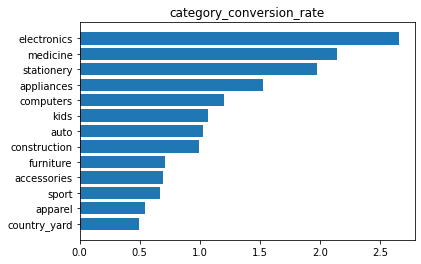

In [ ]:
import matplotlib.pyplot as plt


plt.barh(cat_pur_rate['category'],cat_pur_rate['conversion_rate'])
plt.title('category_conversion_rate')

Text(0.5, 1.0, 'category_total_purchase')

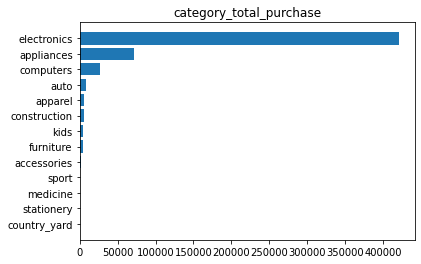

In [ ]:
plt.barh(cat_pur_count['category'],cat_pur_count['buy_count'])
plt.title('category_total_purchase')

Text(0.5, 1.0, 'category_total_purchase')

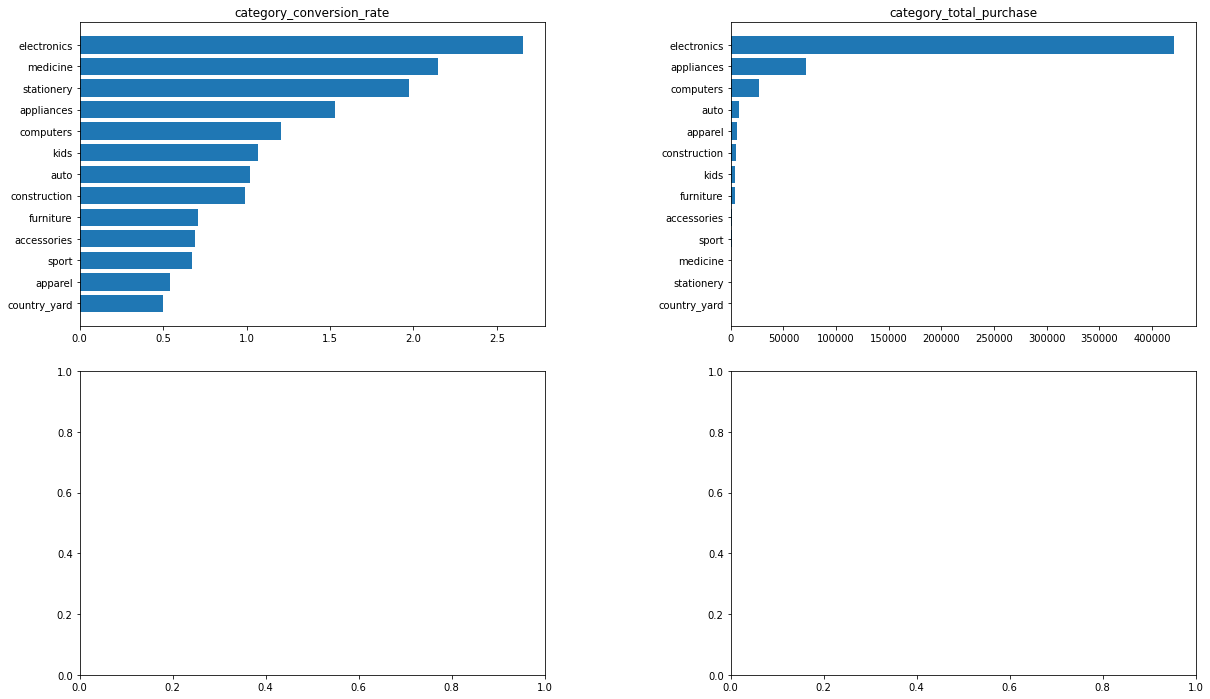

In [ ]:
f, axes = plt.subplots(2, 2)
f.set_size_inches((20, 12))
plt.subplots_adjust(wspace = 0.40, hspace = 0.15)

axes[0,0].barh(cat_pur_rate['category'], cat_pur_rate['conversion_rate'])
axes[0,0].set_title('category_conversion_rate')

axes[0,1].barh(cat_pur_count['category'], cat_pur_count['buy_count'])
axes[0,1].set_title('category_total_purchase')

## 총 판매액, 당 판매액, 판매 전환 이익

In [ ]:
df

In [ ]:
cat_purchase = df[df['event_type'] == 3][['main_category','price']]

In [ ]:
pur_count = cat_purchase.value_counts('main_category').reset_index()

In [ ]:
total_price = cat_purchase.groupby('main_category').sum().reset_index()

In [ ]:
mean_price = cat_purchase.groupby('main_category').mean().reset_index()

In [ ]:
total_price.rename(columns = {'price':'total'},inplace = True)
mean_price.rename(columns = {'price':'mean'},inplace = True)
pur_count.rename(columns = {0:'count'},inplace = True)

In [ ]:
cat_price = pd.merge(pur_count, total_price)
cat_price = pd.merge(cat_price, mean_price)

In [ ]:
cat_price.rename(columns = {'main_category':'category'},inplace = True)

In [ ]:
cat_price = pd.merge(cat_price, cat_pur)

In [ ]:
cat_price.drop('buy_count',axis = 1, inplace = True)

In [ ]:
cat_price['expected_profit'] = cat_price['mean'] * cat_price['conversion_rate']

In [ ]:
cat_price_ex = cat_price.sort_values('expected_profit')
cat_price_mean = cat_price.sort_values('mean')
cat_price_total = cat_price.sort_values('total')

([<matplotlib.patches.Wedge at 0x7f62716dcd50>,
 [Text(1.099999999614242, 2.913190060004457e-05, 'stationery'),
  Text(1.0999999632198945, 0.0002844577844953655, 'medicine'),
  Text(1.099999731152613, 0.0007690670835071128, 'country_yard'),
  Text(1.0999981262130707, 0.0020303516280510848, 'accessories'),
  Text(1.0999717986004676, 0.007876692430997706, 'sport'),
  Text(1.0998050887730808, 0.020706682709601455, 'apparel'),
  Text(1.099317272386791, 0.03874964041208979, 'kids'),
  Text(1.0984167542599752, 0.05899689789286851, 'furniture'),
  Text(1.0969908383732827, 0.08130867435324736, 'construction'),
  Text(1.0944703408717622, 0.11015749158386355, 'auto'),
  Text(1.0541100624445205, 0.3144073412838976, 'computers'),
  Text(0.8667999584462055, 0.6772428161580281, 'appliances'),
  Text(-0.9993247936836248, -0.4597281334975931, 'electronics')],
 [Text(0.5999999997895865, 1.589012760002431e-05, '0.0%'),
  Text(0.5999999799381242, 0.00015515879154292663, '0.0%'),
  Text(0.5999998533559707

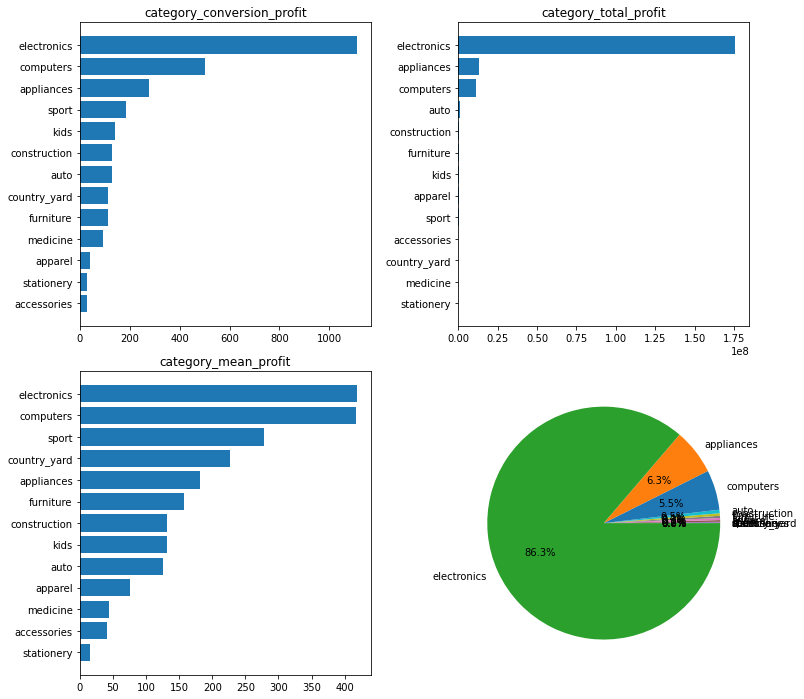

In [ ]:
f, axes = plt.subplots(2, 2)
f.set_size_inches((12, 12))
plt.subplots_adjust(wspace = 0.30, hspace = 0.15)

#판매 전환
axes[0,0].barh(cat_price_ex['category'],cat_price_ex['expected_profit'])
axes[0,0].set_title('category_conversion_profit')
#평균 단가
axes[1,0].barh(cat_price_mean['category'],cat_price_mean['mean'])
axes[1,0].set_title('category_mean_profit')
#총 판매액
axes[0,1].barh(cat_price_total['category'],cat_price_total['total'])
axes[0,1].set_title('category_total_profit')
#파이 차트
axes[1,1].pie(cat_price_total['total'],labels=cat_price_total['category'],autopct='%.1f%%')

Text(0.5, 1.0, 'category_conversion_profit')

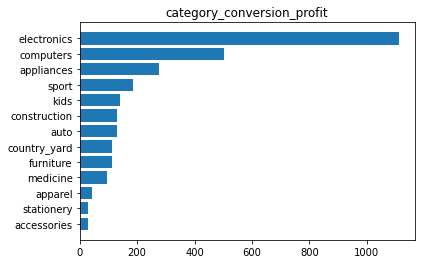

In [ ]:
plt.barh(cat_price_ex['category'],cat_price_ex['expected_profit'])
plt.title('category_conversion_profit')

Text(0.5, 1.0, 'category_mean_profit')

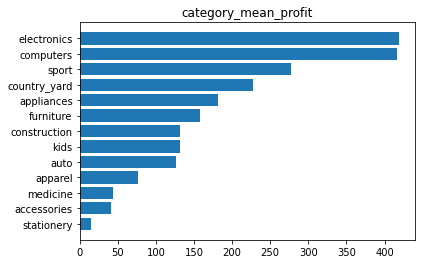

In [ ]:
plt.barh(cat_price_mean['category'],cat_price_mean['mean'])
plt.title('category_mean_profit')

Text(0.5, 1.0, 'category_total_profit')

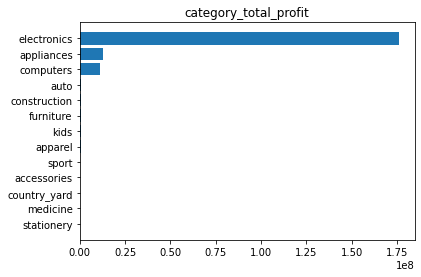

In [ ]:
plt.barh(cat_price_total['category'],cat_price_total['total'])
plt.title('category_total_profit')

([<matplotlib.patches.Wedge at 0x7f621ea3d850>,
 [Text(1.099999999614242, 2.913190060004457e-05, 'stationery'),
  Text(1.0999999632198945, 0.0002844577844953655, 'medicine'),
  Text(1.099999731152613, 0.0007690670835071128, 'country_yard'),
  Text(1.0999981262130707, 0.0020303516280510848, 'accessories'),
  Text(1.0999717986004676, 0.007876692430997706, 'sport'),
  Text(1.0998050887730808, 0.020706682709601455, 'apparel'),
  Text(1.099317272386791, 0.03874964041208979, 'kids'),
  Text(1.0984167542599752, 0.05899689789286851, 'furniture'),
  Text(1.0969908383732827, 0.08130867435324736, 'construction'),
  Text(1.0944703408717622, 0.11015749158386355, 'auto'),
  Text(1.0541100624445205, 0.3144073412838976, 'computers'),
  Text(0.8667999584462055, 0.6772428161580281, 'appliances'),
  Text(-0.9993247936836248, -0.4597281334975931, 'electronics')],
 [Text(0.5999999997895865, 1.589012760002431e-05, '0.0%'),
  Text(0.5999999799381242, 0.00015515879154292663, '0.0%'),
  Text(0.5999998533559707

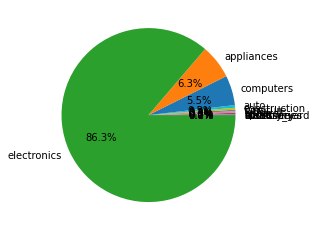

In [ ]:
plt.pie(cat_price_total['total'],labels=cat_price_total['category'],autopct='%.1f%%')

## 일별 구매율

In [ ]:
df['month'] = df['event_time'].dt.month
df['day'] = df['event_time'].dt.day
df['week'] = df['event_time'].dt.dayofweek

In [ ]:
df_10 = df[df['month']==10]

In [ ]:
df_10

In [ ]:
week0 = df_10[df_10['week']==0].value_counts('user_id')
visitor = []
for i in range(0,7):
  x = df_10[df_10['week']== i ].value_counts('user_id')
  visitor.append(len(x))

In [ ]:
day_event = df_10[['day','event_type','week']].groupby('week').count()

In [ ]:
day_pur = df_10[df_10['event_type']==3][['day','event_type','week']].groupby('week').count()

In [ ]:
#4주 한 요일 마다 4번 씩
df_week = df_10[df_10['day'] < 29]

In [ ]:
week_pur = df_week[df_week['event_type']==3][['day','event_type','week']].groupby('week').count()


In [ ]:
week_cart = df_week[df_week['event_type']==2][['event_type','week']].groupby('week').count()

In [ ]:
week_event = df_10[['day','event_type','week']].groupby('week').count()

In [ ]:
week_event

,index,week,day,event_type
0,0,0,3353030,3353030
1,1,1,4181154,4181154
2,2,2,4143064,4143064
3,3,3,4013989,4013989
4,4,4,3640036,3640036
5,5,5,3508526,3508526
6,6,6,3689678,3689678


In [ ]:
week_event.reset_index(inplace = True)

AttributeError: ignored

In [ ]:
week_event.rename(columns = {'event_type':'event_count'}, inplace = True)
week_event.drop(['day'],axis = 1,inplace = True)

In [ ]:
week_pur.reset_index(inplace = True).rename(columns = {'event_type':'pur_count'})

In [ ]:
week_pur

,week,day,pur_count
0,0,71977,71977
1,1,69326,69326
2,2,73300,73300
3,3,69223,69223
4,4,76096,76096
5,5,70602,70602
6,6,73569,73569


In [ ]:
week_pur.rename(columns = {'event_type':'pur_count'}, inplace = True)
week_pur.drop(['day'],axis = 1,inplace = True)

In [ ]:
week_df = pd.merge(week_event,week_pur)

In [ ]:
week_df['conversion_rate'] = week_df['pur_count']/week_df['event_count']*100

In [ ]:
week_df

,week,event_count,pur_count,rate
0,0,3353030,71977,2.146626
1,1,4181154,69326,1.658059
2,2,4143064,73300,1.769222
3,3,4013989,69223,1.724544
4,4,3640036,76096,2.090529
5,5,3508526,70602,2.012298
6,6,3689678,73569,1.993914


In [ ]:
week_cart.reset_index(inplace = True)

In [ ]:
week_cart.rename(columns = {'event_type':'cart'})

,index,week,cart
0,0,0,102435
1,1,1,105234
2,2,2,102204
3,3,3,98965
4,4,4,124329
5,5,5,113878
6,6,6,115791


In [ ]:
week_cart.drop('index',axis = 1, inplace =True)

In [ ]:
week_df = pd.merge(week_df, week_cart)

In [ ]:
week_df['visitor'] = visitor

In [ ]:
week_df.rename(columns = {'event_type':'cart'}, inplace= True)

In [ ]:
week_df.drop('rate',axis = 1, inplace = True)

In [ ]:
week_df['visitor_mean_event'] = week_df['event_count']/ week_df['visitor']
week_df['visitor_mean_pur'] = week_df['pur_count']/week_df['visitor'] 
week_df['visitor_mean_cart'] = week_df['cart']/week_df['visitor'] 


In [ ]:
week_df

,week,event_count,pur_count,cart,visitor,conversion_rate,visitor_mean_event,visitor_mean_pur,visitor_mean_cart
0,0,3353030,71977,102435,517788,2.146626,6.475681,0.139009,0.197832
1,1,4181154,69326,105234,642001,1.658059,6.512691,0.107984,0.163916
2,2,4143064,73300,102204,639430,1.769222,6.479308,0.114633,0.159836
3,3,4013989,69223,98965,618641,1.724544,6.488398,0.111895,0.159972
4,4,3640036,76096,124329,565308,2.090529,6.439031,0.134610,0.219931
5,5,3508526,70602,113878,526181,2.012298,6.667907,0.134178,0.216424
6,6,3689678,73569,115791,544094,1.993914,6.781325,0.135214,0.212814


In [ ]:
week_df.to_csv('week.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'week_event')

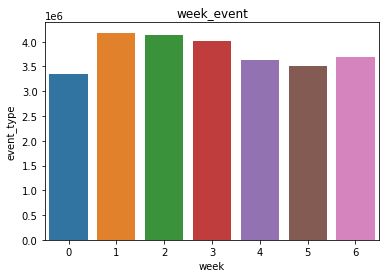

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(week_event['week'],week_event['event_type'])
plt.title('week_event')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


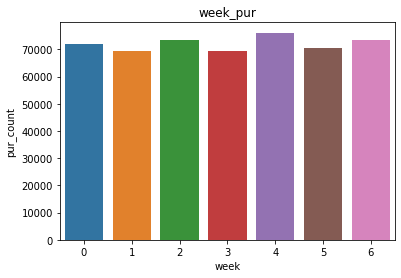

<Figure size 7200x7200 with 0 Axes>

In [ ]:
sns.barplot(week_pur['week'],week_pur['pur_count'])
plt.title('week_pur')
plt.figure(figsize = (100,100))

plt.show()

## 카테고리 분석

### 컴퓨터

In [ ]:
middle = []
for i in df[df['main_category']=='computers']['middle_category']:
 middle.append(i)

In [ ]:
computer = df[df['main_category']=='computers'].value_counts('middle_category').reset_index()

In [ ]:
df

In [ ]:
computer_sub = df[df['middle_category']=='components'].value_counts('sub_category').reset_index()

In [ ]:
df_com = df[df['main_category']=='computers']

In [ ]:
df_com_count_tot = df[df['main_category']=='computers'].groupby('middle_category').count().reset_index()[['middle_category', 'event_type']].rename(columns ={'event_type': 'total_count'})
df_com_count = df_com[df_com['event_type'] == 3].groupby('middle_category').count().reset_index()[['middle_category', 'event_type']].rename(columns ={'event_type': 'pur_count'})
df_com_sum = df_com[df_com['event_type'] == 3].groupby('middle_category').sum().reset_index()[['middle_category', 'price']].rename(columns ={'price': 'total_profit'})
df_com_mean = df_com[df_com['event_type'] == 3].groupby('middle_category').mean().reset_index()[['middle_category', 'price']].rename(columns ={'price': 'mean_price'})


In [ ]:
df_com = pd.merge(df_com_mean,df_com_sum)
df_com = pd.merge(df_com,df_com_count)
df_com = pd.merge(df_com,df_com_count_tot)

In [ ]:
df_com['conversion_rate'] = df_com['pur_count']/df_com['total_count']

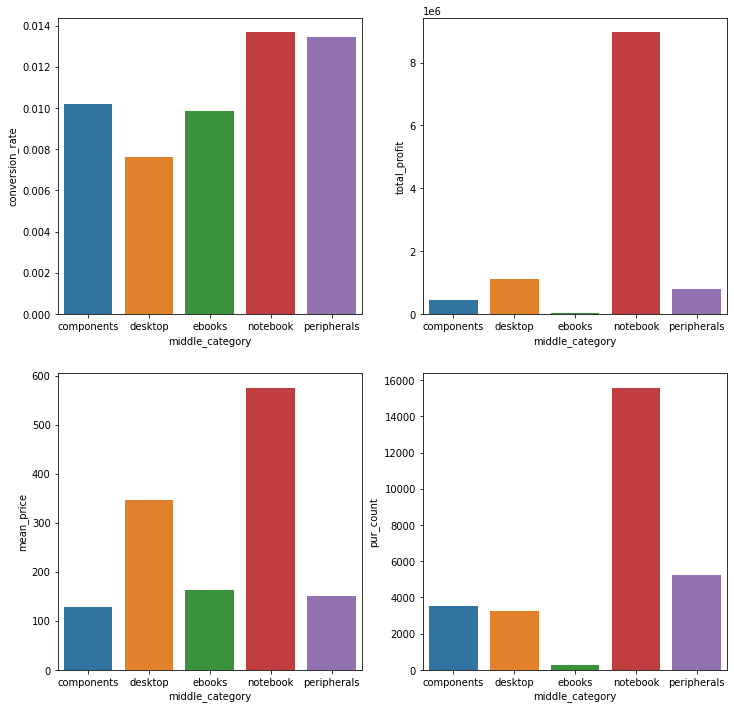

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows = 2,figsize=(12,12))

sns.barplot(x = 'middle_category', y = 'conversion_rate', data = df_com,ax=ax[0,0])
sns.barplot(x = 'middle_category', y = 'total_profit', data = df_com,ax=ax[0,1])
sns.barplot(x = 'middle_category', y = 'mean_price', data = df_com,ax=ax[1,0])
sns.barplot(x = 'middle_category', y = 'pur_count', data = df_com,ax=ax[1,1])




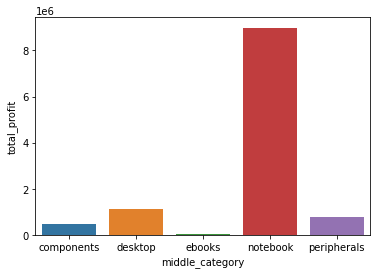

In [ ]:
sns.barplot(x = 'middle_category', y = 'total_profit', data = df_com)

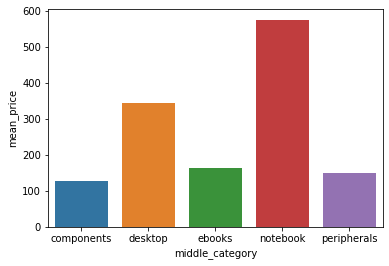

In [ ]:
sns.barplot(x = 'middle_category', y = 'mean_price', data = df_com)

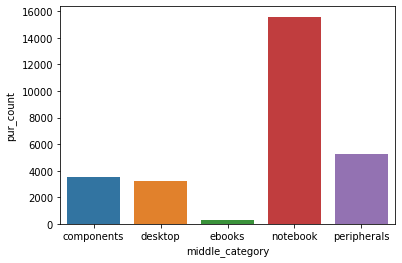

In [ ]:
sns.barplot(x = 'middle_category', y = 'pur_count', data = df_com)

In [ ]:
df_com_mean

,middle_category,mean_price
0,components,128.504058
1,desktop,345.551355
2,ebooks,162.692585
3,notebook,576.003031
4,peripherals,149.812544


In [ ]:
df_com_sum

,middle_category,price
0,components,451563.26
1,desktop,1116821.98
2,ebooks,47831.62
3,notebook,8979887.25
4,peripherals,782770.54


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category,middle_category,sub_category
251,2019-10-01 00:03:34 UTC,1,6700940,2053013554247762257,computers.components.videocards,gigabyte,437.33,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,computers,components,videocards
673,2019-10-01 00:10:58 UTC,1,6700946,2053013554247762257,computers.components.videocards,asus,192.80,530572695,701f9aab-6b40-4796-ab58-3ea9980a6dfb,computers,components,videocards
727,2019-10-01 00:11:53 UTC,1,6700998,2053013554247762257,computers.components.videocards,gigabyte,374.76,555448821,5b69e21b-f6e9-44ac-abbd-5f12c0a5c6c4,computers,components,videocards
1108,2019-10-01 01:12:54 UTC,1,6500533,2053013554155487563,computers.components.motherboard,asus,70.98,536847651,ba6ef05b-0168-4513-a53e-9936047d6e60,computers,components,motherboard
1223,2019-10-01 02:08:19 UTC,1,6701118,2053013554247762257,computers.components.videocards,powercolor,179.93,528132262,f9cdfc7e-4e11-4658-898d-00dadbd7c113,computers,components,videocards
...,...,...,...,...,...,...,...,...,...,...,...,...
42447745,2019-10-31 23:52:11 UTC,1,6501006,2053013554155487563,computers.components.motherboard,asrock,68.21,554428024,327317f9-d39f-4a24-b123-5fa9d17c310c,computers,components,motherboard
42447794,2019-10-31 23:52:39 UTC,1,6501006,2053013554155487563,computers.components.motherboard,asrock,68.21,554428024,327317f9-d39f-4a24-b123-5fa9d17c310c,computers,components,motherboard
42448055,2019-10-31 23:54:36 UTC,1,6501006,2053013554155487563,computers.components.motherboard,asrock,68.21,566276202,6de823ac-f66d-4fd5-b154-fef248f6c5a6,computers,components,motherboard
42448566,2019-10-31 23:58:35 UTC,1,6700978,2053013554247762257,computers.components.videocards,msi,611.86,512370912,daf0bf99-adf1-4877-8308-ae4557b6f01b,computers,components,videocards


### 전자 제품

In [ ]:
ele = df[df['main_category']=='electronics']

In [ ]:
df_ele_count_tot = df[df['main_category']=='electronics'].groupby('middle_category').count().reset_index()[['middle_category', 'event_type']].rename(columns ={'event_type': 'total_count'})
df_ele_count = ele[ele['event_type'] == 3].groupby('middle_category').count().reset_index()[['middle_category', 'event_type']].rename(columns ={'event_type': 'pur_count'})
df_ele_sum = ele[ele['event_type'] == 3].groupby('middle_category').sum().reset_index()[['middle_category', 'price']].rename(columns ={'price': 'total_profit'})
df_ele_mean = ele[ele['event_type'] == 3].groupby('middle_category').mean().reset_index()[['middle_category', 'price']].rename(columns ={'price': 'mean_price'})

In [ ]:
df_ele = pd.merge(df_ele_mean,df_ele_sum)
df_ele = pd.merge(df_ele,df_ele_count)
df_ele = pd.merge(df_ele,df_ele_count_tot)

In [ ]:
df_ele['conversion_rate'] = df_ele['pur_count']/df_ele['total_count']

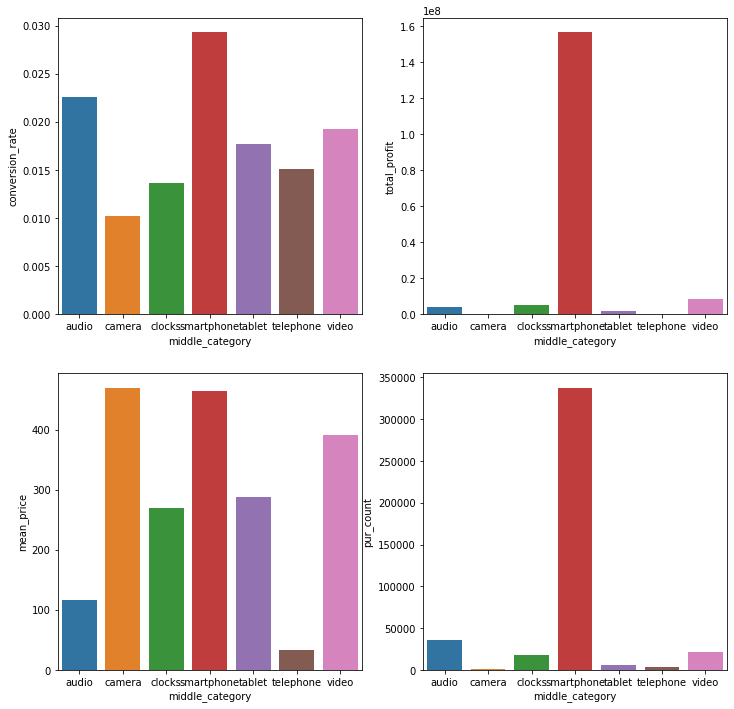

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows = 2,figsize=(12,12))

sns.barplot(x = 'middle_category', y = 'conversion_rate', data = df_ele,ax=ax[0,0])
sns.barplot(x = 'middle_category', y = 'total_profit', data = df_ele,ax=ax[0,1])
sns.barplot(x = 'middle_category', y = 'mean_price', data = df_ele,ax=ax[1,0])
sns.barplot(x = 'middle_category', y = 'pur_count', data = df_ele,ax=ax[1,1])


###가전제품


In [ ]:
ele = df[df['main_category']=='appliances']

In [ ]:
df_ele_count_tot = df[df['main_category']=='appliances'].groupby('middle_category').count().reset_index()[['middle_category', 'event_type']].rename(columns ={'event_type': 'total_count'})
df_ele_count = ele[ele['event_type'] == 3].groupby('middle_category').count().reset_index()[['middle_category', 'event_type']].rename(columns ={'event_type': 'pur_count'})
df_ele_sum = ele[ele['event_type'] == 3].groupby('middle_category').sum().reset_index()[['middle_category', 'price']].rename(columns ={'price': 'total_profit'})
df_ele_mean = ele[ele['event_type'] == 3].groupby('middle_category').mean().reset_index()[['middle_category', 'price']].rename(columns ={'price': 'mean_price'})

In [ ]:
df_ele = pd.merge(df_ele_mean,df_ele_sum)
df_ele = pd.merge(df_ele,df_ele_count)
df_ele = pd.merge(df_ele,df_ele_count_tot)

In [ ]:
df_ele['conversion_rate'] = df_ele['pur_count']/df_ele['total_count']

In [ ]:
df_ele

,middle_category,mean_price,total_profit,pur_count,total_count,conversion_rate
0,environment,128.392634,2320568.47,18074,1147634,0.015749
1,iron,61.258434,223777.06,3653,165393,0.022087
2,ironing_board,39.658855,26333.48,664,35282,0.018820
3,kitchen,218.890222,10533873.02,48124,3317047,0.014508
4,personal,29.195067,74213.86,2542,149670,0.016984
5,sewing_machine,208.538437,404356.03,1939,152268,0.012734


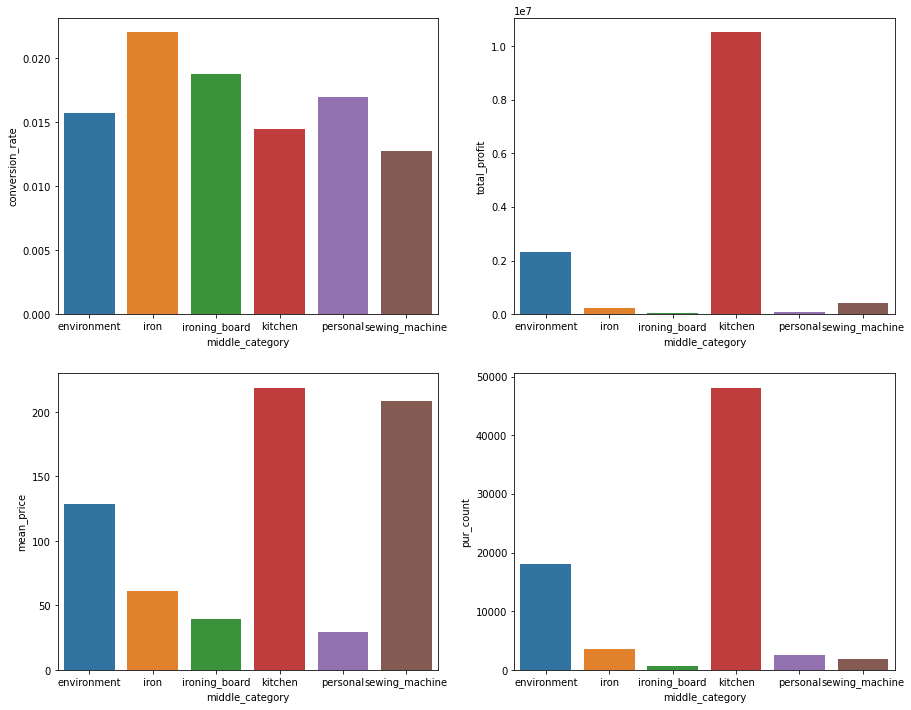

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows = 2,figsize=(15,12))

sns.barplot(x = 'middle_category', y = 'conversion_rate', data = df_ele,ax=ax[0,0])
sns.barplot(x = 'middle_category', y = 'total_profit', data = df_ele,ax=ax[0,1])
sns.barplot(x = 'middle_category', y = 'mean_price', data = df_ele,ax=ax[1,0])
sns.barplot(x = 'middle_category', y = 'pur_count', data = df_ele,ax=ax[1,1])


## 재방문율


In [ ]:
df_re = df[df['event_type']==1]

In [ ]:
df_re['split'] = df_re['event_time'].apply(lambda x : x.split(' '))

In [ ]:
df_re['Day'] = [x[0] for x in df_re['split']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_re.drop(['event_time', 'event_type','split'],axis = 1, inplace=True)

## 전자 브랜드


In [ ]:
df_ele = df[df['main_category']=='electronics']

In [ ]:
#전자제품 이벤트 수
df_ele_event = df_ele.groupby('brand').count().sort_values('user_id',ascending = False)[['event_time','event_type']]

In [ ]:
#전자제품 판매 수 > 이 브랜드가 인기가 좋다.
df_ele_pur = df_ele[df_ele['event_type']==3]
df_ele_pur = df_ele_pur.groupby('brand').count().sort_values('event_type', ascending = False)[['event_time','event_type']]

In [ ]:
#판매 전환율 > 이 브랜드가 효율이 좋다.
df_ele_event.reset_index(inplace = True)
df_ele_pur.reset_index(inplace = True)

In [ ]:
# 열 제거
df_ele_event.drop('event_time',axis = 1, inplace = True)

In [ ]:
df_ele_pur.drop('event_time',axis = 1, inplace = True)

In [ ]:
df_ele_pur.rename(columns = {'event_type':'pur_count'},inplace = True)
df_ele_event.rename(columns = {'event_type':'event_count'},inplace = True)

In [ ]:
df_ele1 = pd.merge(df_ele_pur, df_ele_event)

In [ ]:
#판매 전환율 
df_ele1['conversion'] = (df_ele1['pur_count']/df_ele1['event_count']) * 100

In [ ]:
df_ele_price = df_ele[df_ele['event_type']==3]
df_ele_price = df_ele_price.groupby('brand').sum().sort_values('price', ascending = False)[['event_type','price']]
df_ele_price = df_ele_price.reset_index()
df_ele_price.drop('event_type', axis = 1, inplace = True)
df_ele_price

,brand,price
0,apple,1.093820e+08
1,samsung,4.319420e+07
2,xiaomi,8.334418e+06
3,huawei,4.869737e+06
4,oppo,2.412960e+06
...,...,...
246,acqua,1.184000e+01
247,g-cube,9.780000e+00
248,manhattan,5.350000e+00
249,intro,3.840000e+00


In [ ]:
df_ele1 = pd.merge(df_ele1, df_ele_price)

In [ ]:
df_ele1.head(5)

,brand,pur_count,event_count,conversion,price
0,samsung,159621,4515669,3.534825,4.319420e+07
1,apple,141394,3989023,3.544577,1.093820e+08
2,xiaomi,44767,2527902,1.770915,8.334418e+06
3,huawei,23220,1089766,2.130733,4.869737e+06
4,oppo,10891,482887,2.255393,2.412960e+06


In [ ]:
df_ele1['mean'] = df_ele1['price']/df_ele1['pur_count']

In [ ]:
df_ele1.head(10)

,brand,pur_count,event_count,conversion,price,mean
0,samsung,159621,4515669,3.534825,4.319420e+07,270.604773
1,apple,141394,3989023,3.544577,1.093820e+08,773.597412
2,xiaomi,44767,2527902,1.770915,8.334418e+06,186.173249
3,huawei,23220,1089766,2.130733,4.869737e+06,209.721654
4,oppo,10891,482887,2.255393,2.412960e+06,221.555391
5,artel,3053,149476,2.042468,5.795813e+05,189.839934
6,lg,2701,170806,1.581326,1.328546e+06,491.872066
7,casio,2660,253560,1.049061,1.992671e+05,74.912451
8,nokia,2218,174948,1.267805,1.643282e+05,74.088445
9,sony,2153,209469,1.027837,7.218687e+05,335.285053


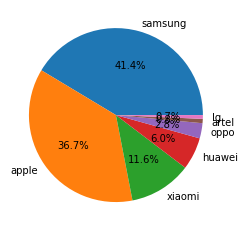

In [ ]:
plt.pie(df_ele1['pur_count'][:7], labels=df_ele1['brand'][:7], autopct='%.1f%%')
plt.show()

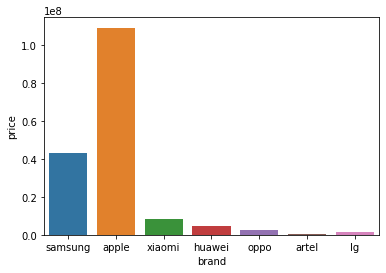

In [ ]:
sns.barplot(x = 'brand', y = 'price' ,data = df_ele1[:7])

### 브랜드 별 중복 구매

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_sam = df_ele[df_ele['brand']=='samsung']
df_sam = df_sam[df_sam['event_type']==3]

In [ ]:
sam_id = []
for i in df_sam['user_id']:
    sam_id.append(i)

In [ ]:
sam_id = list(set(sam_id))

In [ ]:
sam_id

[560463873,
 561774593,
 553648129,
 557056006,
 559415302,
 562823174,
 542375945,
 519307274,
 519045139,
 560201748,
 562561048,
 513802264,
 546832414,
 554172447,
 552861731,
 549978152,
 546832427,
 549453874,
 515637298,
 515375165,
 554434623,
 551813184,
 521666626,
 536084549,
 548143176,
 515375180,
 554434637,
 555483214,
 515637326,
 526647376,
 549453914,
 513540193,
 518783076,
 534773861,
 512491622,
 532938855,
 564133992,
 562561129,
 548405356,
 524025965,
 515899506,
 550764658,
 519045237,
 559415424,
 513278080,
 532676737,
 513015940,
 555483270,
 520093833,
 565706889,
 557318284,
 517472397,
 557056144,
 515637394,
 515637397,
 556269718,
 559153302,
 542376087,
 555221145,
 565969047,
 564396187,
 563085467,
 564658333,
 522453153,
 557318306,
 544473251,
 557580452,
 554696869,
 561512624,
 526909617,
 549454003,
 563085491,
 514326714,
 561774779,
 546570428,
 563609788,
 521928891,
 533987523,
 561774792,
 562561225,
 536346829,
 563609806,
 536084688,
 559

In [ ]:
df_pur = df[df['event_type']==3]

### 삼성

In [ ]:
sam_count_list = []
rate = 0
for i in sam_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #samsung 구매 횟수
  
  for i in user_brand:
    if i == 'samsung':
      count += 1

  sam_count_list.append(count)
  rate += 1
  per = (rate/len(sam_id)) *100
  print(per)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
94.16869830975072
94.1698648033875
94.17103129702427
94.17219779066104
94.17336428429783
94.1745307779346
94.17569727157138
94.17686376520817
94.17803025884494
94.17919675248172
94.18036324611849
94.18152973975526
94.18269623339205
94.18386272702882
94.18502922066561
94.18619571430239
94.18736220793915
94.18852870157593
94.1896951952127
94.1908616888495
94.19202818248627
94.19319467612304
94.19436116975982
94.19552766339659
94.19669415703338
94.19786065067015
94.19902714430692
94.20019363794371
94.20136013158049
94.20252662521726
94.20369311885403
94.20485961249081
94.2060261061276
94.20719259976437
94.20835909340116
94.20952558703792
94.21069208067469
94.21185857431148
94.21302506794825
94.21419156158504
94.21535805522181
94.21652454885859
94.21769104249536
94.21885753613213
94.22002402976892
94.2211905234057
94.22235701704247
94.22352351067926
94.22469000431603
94.2258564979528
94.22702299158958
94.22818948522635
94.22935597886314
94.23052247249991

In [ ]:
samsung = pd.DataFrame()
samsung['id'] = sam_id
samsung['count'] = sam_count_list 

### 애플

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_apple = df_ele[df_ele['brand']=='apple']
df_apple = df_apple[df_apple['event_type']==3]

In [ ]:
apple_id = []
for i in df_apple['user_id']:
    apple_id.append(i)

In [ ]:
apple_id = list(set(apple_id))

In [ ]:
apple_count_list = []
rate = 0
for i in apple_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'apple':
      count += 1

  apple_count_list.append(count)
  rate += 1
  per = (rate/len(apple_id)) *100
  print(per)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
92.30745556666923
92.30899438331923
92.31053319996923
92.31207201661921
92.31361083326921
92.31514964991922
92.3166884665692
92.3182272832192
92.3197660998692
92.3213049165192
92.3228437331692
92.32438254981918
92.32592136646919
92.32746018311919
92.32899899976917
92.33053781641918
92.33207663306916
92.33361544971916
92.33515426636916
92.33669308301916
92.33823189966915
92.33977071631915
92.34130953296915
92.34284834961915
92.34438716626914
92.34592598291913
92.34746479956914
92.34900361621912
92.35054243286912
92.35208124951913
92.35362006616911
92.35515888281911
92.35669769946911
92.3582365161191
92.3597753327691
92.36131414941909
92.3628529660691
92.3643917827191
92.36593059936908
92.36746941601908
92.36900823266907
92.37054704931907
92.37208586596907
92.37362468261907
92.37516349926906
92.37670231591906
92.37824113256904
92.37977994921906
92.38131876586905
92.38285758251904
92.38439639916905
92.38593521581903
92.38747403246903
92.38901284911903
9

In [ ]:
apple = pd.DataFrame()
apple['id'] = apple_id
apple['count'] = apple_count_list 

In [ ]:
apple

,id,count
0,520749056,1
1,521404418,1
2,516816901,2
3,557056006,1
4,558759942,2
...,...,...
64980,558759930,1
64981,558759931,5
64982,512622588,1
64983,546701310,1


### 샤오미

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_xiaomi = df_ele[df_ele['brand']=='xiaomi']
df_xiaomi = df_xiaomi[df_xiaomi['event_type']==3]

xiaomi_id = []
for i in df_xiaomi['user_id']:
    xiaomi_id.append(i)

xiaomi_id = list(set(xiaomi_id))

xiaomi_count_list = []
rate = 0
for i in xiaomi_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'xiaomi':
      count += 1

  xiaomi_count_list.append(count)
  rate += 1
  per = (rate/len(xiaomi_id)) *100
  print(per)

xiaomi = pd.DataFrame()
xiaomi['id'] = xiaomi_id
xiaomi['count'] = xiaomi_count_list 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
81.63617662184997
81.63985012122548
81.64352362060099
81.64719711997648
81.65087061935199
81.6545441187275
81.658217618103
81.66189111747852
81.66556461685401
81.66923811622952
81.67291161560503
81.67658511498053
81.68025861435603
81.68393211373154
81.68760561310705
81.69127911248255
81.69495261185806
81.69862611123357
81.70229961060906
81.70597310998457
81.70964660936008
81.71332010873557
81.71699360811108
81.72066710748659
81.7243406068621
81.7280141062376
81.73168760561312
81.73536110498861
81.73903460436411
81.74270810373963
81.74638160311513
81.75005510249063
81.75372860186614
81.75740210124164
81.76107560061715
81.76474909999266
81.76842259936817
81.77209609874366
81.77576959811917
81.77944309749468
81.78311659687017
81.78679009624568
81.79046359562119
81.79413709499669
81.7978105943722
81.8014840937477
81.80515759312321
81.8088310924987
81.81250459187423
81.81617809124972
81.81985159062522
81.82352509000074
81.82719858937624
81.83087208875175


In [ ]:
xiaomi

,id,count
0,515375109,1
1,562823174,1
2,524812303,1
3,513015824,2
4,527958034,1
...,...,...
27217,514719722,1
27218,555745260,1
27219,557580268,1
27220,516685809,1


### huawei

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_huawei = df_ele[df_ele['brand']=='huawei']
df_huawei = df_huawei[df_huawei['event_type']==3]

huawei_id = []
for i in df_huawei['user_id']:
    huawei_id.append(i)

huawei_id = list(set(huawei_id))

huawei_count_list = []
rate = 0
for i in huawei_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'huawei':
      count += 1

  huawei_count_list.append(count)
  rate += 1
  per = (rate/len(huawei_id)) *100
  print(per)

huawei = pd.DataFrame()
huawei['id'] = huawei_id
huawei['count'] = huawei_count_list 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
67.04245780590718
67.04905063291139
67.05564345991561
67.06223628691983
67.06882911392405
67.07542194092827
67.08201476793249
67.08860759493672
67.09520042194093
67.10179324894516
67.10838607594937
67.11497890295358
67.12157172995781
67.12816455696202
67.13475738396625
67.14135021097046
67.14794303797468
67.1545358649789
67.16112869198312
67.16772151898735
67.17431434599156
67.18090717299579
67.1875
67.19409282700421
67.20068565400844
67.20727848101265
67.21387130801688
67.2204641350211
67.22705696202532
67.23364978902954
67.24024261603375
67.24683544303798
67.25342827004219
67.26002109704642
67.26661392405063
67.27320675105484
67.27979957805907
67.28639240506328
67.29298523206751
67.29957805907173
67.30617088607595
67.31276371308017
67.31935654008439
67.32594936708861
67.33254219409282
67.33913502109705
67.34572784810126
67.35232067510549
67.3589135021097
67.36550632911393
67.37209915611815
67.37869198312237
67.38528481012658
67.3918776371308
67.398

In [ ]:
huawei

,id,count
0,528023554,1
1,562298891,1
2,512819218,1
3,512589848,1
4,522977306,1
...,...,...
15163,513343473,2
15164,538771439,1
15165,552435701,2
15166,515145722,1


### oppo

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_oppo = df_ele[df_ele['brand']=='oppo']
df_oppo = df_oppo[df_oppo['event_type']==3]

oppo_id = []
for i in df_oppo['user_id']:
    oppo_id.append(i)

oppo_id = list(set(oppo_id))

oppo_count_list = []
rate = 0
for i in oppo_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'oppo':
      count += 1

  oppo_count_list.append(count)
  rate += 1
  per = (rate/len(oppo_id)) *100
  print(per)

oppo = pd.DataFrame()
oppo['id'] = oppo_id
oppo['count'] = oppo_count_list 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
29.452441433813153
29.466553767993226
29.4806661021733
29.494778436353375
29.508890770533448
29.523003104713517
29.53711543889359
29.55122777307367
29.56534010725374
29.579452441433812
29.593564775613885
29.60767710979396
29.621789443974034
29.635901778154107
29.650014112334176
29.664126446514256
29.678238780694326
29.6923511148744
29.70646344905447
29.720575783234548
29.73468811741462
29.748800451594693
29.762912785774766
29.777025119954843
29.791137454134915
29.805249788314985
29.819362122495065
29.833474456675134
29.847586790855207
29.86169912503528
29.875811459215356
29.88992379339543
29.904036127575502
29.91814846175557
29.93226079593565
29.946373130115724
29.960485464295793
29.974597798475866
29.988710132655942
30.002822466836015
30.016934801016088
30.03104713519616
30.045159469376237
30.05927180355631
30.07338413773638
30.087496471916452
30.10160880609653
30.1157211402766
30.129833474456674
30.143945808636747
30.158058142816824
30.172170476996

In [ ]:
oppo

,id,count
0,524386307,1
1,513179656,1
2,551944200,1
3,554631178,2
4,561774625,1
...,...,...
7081,561643498,1
7082,561283052,1
7083,553484273,1
7084,517734391,4


### 결과 확인

In [ ]:
ele_brand = [samsung,apple,xiaomi,huawei,oppo]
ele_dup = []
for i in ele_brand:
  ele_dup.append(i['count'].mean())

In [ ]:
ele = pd.DataFrame()
ele['brand'] = ['samsung','apple','xiaomi','huawei','oppo']
ele['dup'] = ele_dup  

In [ ]:
ele

,brand,dup
0,samsung,1.884552
1,apple,2.182427
2,xiaomi,1.649548
3,huawei,1.531118
4,oppo,1.536974


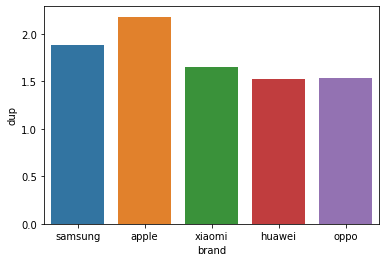

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='brand', y = 'dup', data = ele)

## 가전 브랜드


In [ ]:
df_app = df[df['main_category']=='appliances']

In [ ]:
#전자제품 이벤트 수
df_app_event = df_app.groupby('brand').count().sort_values('user_id',ascending = False)[['event_time','event_type']]

In [ ]:
#전자제품 판매 수 > 이 브랜드가 인기가 좋다.
df_app_pur = df_app[df_app['event_type']==3]
df_app_pur = df_app_pur.groupby('brand').count().sort_values('event_type', ascending = False)[['event_time','event_type']]

In [ ]:
#판매 전환율 > 이 브랜드가 효율이 좋다.
df_app_event.reset_index(inplace = True)
df_app_pur.reset_index(inplace = True)

In [ ]:
# 열 제거
df_app_event.drop('event_time',axis = 1, inplace = True)

In [ ]:
df_app_pur.drop('event_time',axis = 1, inplace = True)

In [ ]:
df_app_pur.rename(columns = {'event_type':'pur_count'},inplace = True)
df_app_event.rename(columns = {'event_type':'event_count'},inplace = True)

In [ ]:
df_app1 = pd.merge(df_app_pur, df_app_event)

In [ ]:
#판매 전환율 
df_app1['conversion'] = (df_app1['pur_count']/df_app1['event_count']) * 100

In [ ]:
df_app_price = df_app[df_app['event_type']==3]
df_app_price = df_app_price.groupby('brand').sum().sort_values('price', ascending = False)[['event_type','price']]
df_app_price = df_app_price.reset_index()
df_app_price.drop('event_type', axis = 1, inplace = True)
df_app_price

,brand,price
0,samsung,3055420.50
1,lg,1877593.40
2,indesit,1249809.18
3,beko,925990.36
4,bosch,794649.47
...,...,...
224,ecoterm,21.65
225,fit-rx,17.76
226,marta,14.16
227,masstone,13.90


In [ ]:
df_app1 = pd.merge(df_app1, df_app_price)

In [ ]:
df_app1

,brand,pur_count,event_count,conversion,price
0,samsung,11559,598001,1.932940,3055420.50
1,elenberg,5201,197773,2.629783,198580.21
2,lg,5033,329252,1.528616,1877593.40
3,indesit,5023,290072,1.731639,1249809.18
4,beko,3839,206938,1.855145,925990.36
...,...,...,...,...,...
224,jack,1,349,0.286533,456.18
225,marta,1,305,0.327869,14.16
226,ecoterm,1,248,0.403226,21.65
227,imetec,1,87,1.149425,46.31


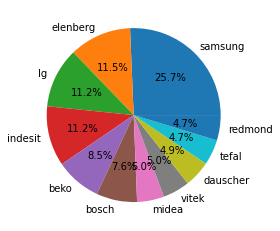

In [ ]:
plt.pie(df_app1['pur_count'][:11], labels=df_app1['brand'][:11], autopct='%.1f%%')
plt.show()

### elenberg

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_elenberg = df_app[df_app['brand']=='elenberg']
df_elenberg = df_elenberg[df_elenberg['event_type']==3]

elenberg_id = []
for i in df_elenberg['user_id']:
    elenberg_id.append(i)

elenberg_id = list(set(elenberg_id))

elenberg_count_list = []
rate = 0
for i in elenberg_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'elenberg':
      count += 1

  elenberg_count_list.append(count)
  rate += 1
  per = (rate/len(elenberg_id)) *100
  print(per)

elenberg = pd.DataFrame()
elenberg['id'] = elenberg_id
elenberg['count'] = elenberg_count_list 

0.023512814483893724
0.04702562896778745
0.07053844345168116
0.0940512579355749
0.11756407241946862
0.14107688690336231
0.16458970138725607
0.1881025158711498
0.2116153303550435
0.23512814483893724
0.25864095932283093
0.28215377380672463
0.3056665882906184
0.32917940277451213
0.3526922172584058
0.3762050317422996
0.3997178462261932
0.423230660710087
0.4467434751939807
0.4702562896778745
0.49376910416176817
0.5172819186456619
0.5407947331295556
0.5643075476134493
0.5878203620973431
0.6113331765812368
0.6348459910651305
0.6583588055490243
0.6818716200329179
0.7053844345168117
0.7288972490007053
0.7524100634845992
0.7759228779684929
0.7994356924523864
0.8229485069362802
0.846461321420174
0.8699741359040678
0.8934869503879614
0.9169997648718552
0.940512579355749
0.9640253938396426
0.9875382083235363
1.01105102280743
1.0345638372913237
1.0580766517752174
1.0815894662591112
1.1051022807430049
1.1286150952268985
1.1521279097107924
1.1756407241946862
1.1991535386785799
1.2226663531624735
1.246

In [ ]:
elenberg

,id,count
0,525156352,1
1,516710402,1
2,519225347,1
3,514940932,1
4,548397065,1
...,...,...
4248,527630317,1
4249,560095214,1
4250,513392632,3
4251,512843771,2


### lg

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_lg = df_app[df_app['brand']=='lg']
df_lg = df_lg[df_lg['event_type']==3]

lg_id = []
for i in df_lg['user_id']:
    lg_id.append(i)

lg_id = list(set(lg_id))

lg_count_list = []
rate = 0
for i in lg_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'lg':
      count += 1

  lg_count_list.append(count)
  rate += 1
  per = (rate/len(lg_id)) *100
  print(per)

lg = pd.DataFrame()
lg['id'] = lg_id
lg['count'] = lg_count_list 

0.02770850651149903
0.05541701302299806
0.0831255195344971
0.11083402604599613
0.13854253255749516
0.1662510390689942
0.19395954558049322
0.22166805209199225
0.24937655860349126
0.2770850651149903
0.30479357162648935
0.3325020781379884
0.36021058464948735
0.38791909116098644
0.41562759767248547
0.4433361041839845
0.4710446106954835
0.4987531172069825
0.5264616237184816
0.5541701302299806
0.5818786367414797
0.6095871432529787
0.6372956497644777
0.6650041562759768
0.6927126627874758
0.7204211692989747
0.7481296758104738
0.7758381823219729
0.8035466888334718
0.8312551953449709
0.8589637018564699
0.886672208367969
0.914380714879468
0.942089221390967
0.9697977279024661
0.997506234413965
1.0252147409254642
1.0529232474369632
1.0806317539484622
1.1083402604599613
1.1360487669714603
1.1637572734829593
1.1914657799944584
1.2191742865059574
1.2468827930174564
1.2745912995289554
1.3022998060404543
1.3300083125519535
1.3577168190634525
1.3854253255749516
1.4131338320864506
1.4408423385979494
1.468

In [ ]:
lg

,id,count
0,562872320,1
1,514588676,1
2,555417605,1
3,517111812,1
4,542834695,1
...,...,...
3604,559087606,1
3605,516349943,1
3606,513294329,1
3607,542130172,1


### indesit	

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_indesit = df_app[df_app['brand']=='indesit']
df_indesit = df_indesit[df_indesit['event_type']==3]

indesit_id = []
for i in df_indesit['user_id']:
    indesit_id.append(i)

indesit_id = list(set(indesit_id))

indesit_count_list = []
rate = 0
for i in indesit_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'indesit':
      count += 1

  indesit_count_list.append(count)
  rate += 1
  per = (rate/len(indesit_id)) *100
  print(per)

indesit = pd.DataFrame()
indesit['id'] = indesit_id
indesit['count'] = indesit_count_list 

0.027434842249657067
0.054869684499314134
0.0823045267489712
0.10973936899862827
0.1371742112482853
0.1646090534979424
0.19204389574759945
0.21947873799725653
0.24691358024691357
0.2743484224965706
0.30178326474622774
0.3292181069958848
0.35665294924554186
0.3840877914951989
0.411522633744856
0.43895747599451307
0.4663923182441701
0.49382716049382713
0.5212620027434842
0.5486968449931412
0.5761316872427984
0.6035665294924555
0.6310013717421125
0.6584362139917695
0.6858710562414266
0.7133058984910837
0.7407407407407408
0.7681755829903978
0.7956104252400549
0.823045267489712
0.8504801097393689
0.8779149519890261
0.9053497942386831
0.9327846364883402
0.9602194787379973
0.9876543209876543
1.0150891632373114
1.0425240054869684
1.0699588477366255
1.0973936899862824
1.1248285322359397
1.1522633744855968
1.1796982167352537
1.207133058984911
1.2345679012345678
1.262002743484225
1.289437585733882
1.316872427983539
1.3443072702331962
1.3717421124828533
1.3991769547325104
1.4266117969821674
1.4540

In [ ]:
indesit

,id,count
0,538435585,1
1,550535172,1
2,516816901,3
3,542834695,1
4,555163657,1
...,...,...
3640,519094258,1
3641,541671410,2
3642,549969907,1
3643,527908854,1


### beko

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_beko = df_app[df_app['brand']=='beko']
df_beko = df_beko[df_beko['event_type']==3]

beko_id = []
for i in df_beko['user_id']:
    beko_id.append(i)

beko_id = list(set(beko_id))

beko_count_list = []
rate = 0
for i in beko_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'beko':
      count += 1

  beko_count_list.append(count)
  rate += 1
  per = (rate/len(beko_id)) *100
  print(per)

beko = pd.DataFrame()
beko['id'] = beko_id
beko['count'] = beko_count_list 

0.03718854592785422
0.07437709185570844
0.11156563778356265
0.14875418371141688
0.1859427296392711
0.2231312755671253
0.26031982149497956
0.29750836742283376
0.334696913350688
0.3718854592785422
0.4090740052063964
0.4462625511342506
0.4834510970621049
0.5206396429899591
0.5578281889178133
0.5950167348456675
0.6322052807735217
0.669393826701376
0.7065823726292302
0.7437709185570844
0.7809594644849386
0.8181480104127928
0.8553365563406471
0.8925251022685012
0.9297136481963555
0.9669021941242097
1.004090740052064
1.0412792859799183
1.0784678319077723
1.1156563778356265
1.1528449237634808
1.190033469691335
1.2272220156191893
1.2644105615470433
1.3015991074748978
1.338787653402752
1.375976199330606
1.4131647452584604
1.4503532911863146
1.4875418371141689
1.5247303830420231
1.5619189289698772
1.5991074748977314
1.6362960208255857
1.6734845667534402
1.7106731126812942
1.7478616586091484
1.7850502045370025
1.822238750464857
1.859427296392711
1.8966158423205652
1.9338043882484195
1.970992934176

In [ ]:
beko

,id,count
0,562872320,1
1,545308673,1
2,512819202,1
3,550305796,1
4,517111812,1
...,...,...
2684,552067060,1
2685,544702452,1
2686,556351482,3
2687,514883579,1


### 결과 확인

In [ ]:
app_brand = [elenberg,lg, indesit, beko]
app_dup = []
for i in app_brand:
  app_dup.append(i['count'].mean())

In [ ]:
app = pd.DataFrame()
app['brand'] = ['elenberg','lg', 'indesit', 'beko']
app['dup'] = app_dup  

In [ ]:
app

,brand,dup
0,elenberg,1.223842
1,lg,1.470213
2,indesit,1.378052
3,beko,1.427668


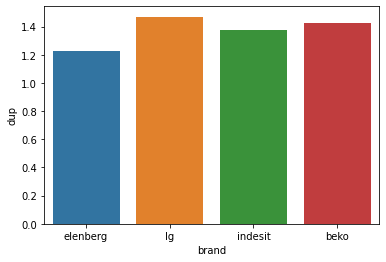

In [ ]:
sns.barplot(x='brand', y = 'dup', data = app)

## 컴퓨터 브랜드


In [ ]:
df_com = df[df['main_category']=='computers']

In [ ]:
df_pur = df[df['event_type']==3]

In [ ]:
#제품 이벤트 수
df_com_event = df_com.groupby('brand').count().sort_values('user_id',ascending = False)[['event_time','event_type']]

In [ ]:
#제품 판매 수 > 이 브랜드가 인기가 좋다.
df_com_pur = df_com[df_com['event_type']==3]
df_com_pur = df_com_pur.groupby('brand').count().sort_values('event_type', ascending = False)[['event_time','event_type']]

In [ ]:
#판매 전환율 > 이 브랜드가 효율이 좋다.
df_com_event.reset_index(inplace = True)
df_com_pur.reset_index(inplace = True)

In [ ]:
# 열 제거
df_com_event.drop('event_time',axis = 1, inplace = True)

In [ ]:
df_com_pur.drop('event_time',axis = 1, inplace = True)

In [ ]:
df_com_pur.rename(columns = {'event_type':'pur_count'},inplace = True)
df_com_event.rename(columns = {'event_type':'event_count'},inplace = True)

In [ ]:
df_com1 = pd.merge(df_com_pur, df_com_event)

In [ ]:
#판매 전환율 
df_com1['conversion'] = (df_com1['pur_count']/df_com1['event_count']) * 100

In [ ]:
df_com_price = df_com[df_com['event_type']==3]
df_com_price = df_com_price.groupby('brand').sum().sort_values('price', ascending = False)[['event_type','price']]
df_com_price = df_com_price.reset_index()
df_com_price.drop('event_type', axis = 1, inplace = True)
df_com_price

,brand,price
0,acer,3570782.95
1,apple,1807261.74
2,lenovo,1701878.17
3,hp,1208581.63
4,asus,963252.18
...,...,...
123,gembird,32.07
124,cobra,28.06
125,air-cool,12.30
126,acme,10.70


In [ ]:
df_com1 = pd.merge(df_com1, df_com_price)

In [ ]:
df_com1['mean'] = df_com1['price']/df_com1['pur_count']

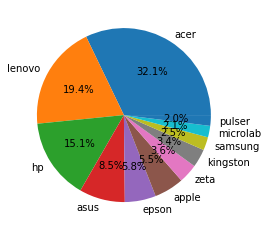

In [ ]:
plt.pie(df_com1['pur_count'][:11], labels=df_com1['brand'][:11], autopct='%.1f%%')
plt.show()

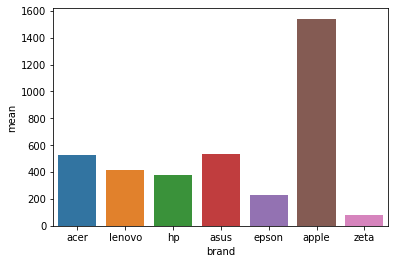

In [ ]:
sns.barplot(x= 'brand', y = 'mean', data = df_com1[:7])

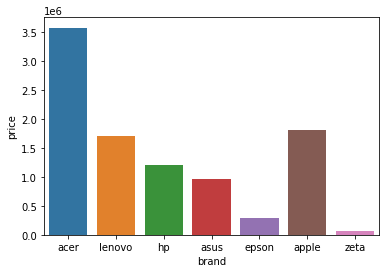

In [ ]:
sns.barplot(x= 'brand', y = 'price', data = df_com1[:7])

### acer

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_acer = df_com[df_com['brand']=='acer']
df_acer = df_acer[df_acer['event_type']==3]

acer_id = []
for i in df_acer['user_id']:
    acer_id.append(i)

acer_id = list(set(acer_id))

acer_count_list = []
rate = 0
for i in acer_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'acer':
      count += 1

  acer_count_list.append(count)
  rate += 1
  per = (rate/len(acer_id)) *100
  print(per)

acer = pd.DataFrame()
acer['id'] = acer_id
acer['count'] = acer_count_list 

0.023207240659085637
0.046414481318171275
0.0696217219772569
0.09282896263634255
0.11603620329542817
0.1392434439545138
0.16245068461359943
0.1856579252726851
0.2088651659317707
0.23207240659085634
0.25527964724994195
0.2784868879090276
0.30169412856811323
0.32490136922719887
0.34810860988628456
0.3713158505453702
0.3945230912044558
0.4177303318635414
0.44093757252262705
0.4641448131817127
0.4873520538407983
0.5105592944998839
0.5337665351589695
0.5569737758180552
0.5801810164771408
0.6033882571362265
0.6265954977953121
0.6498027384543977
0.6730099791134834
0.6962172197725691
0.7194244604316548
0.7426317010907404
0.7658389417498259
0.7890461824089116
0.8122534230679972
0.8354606637270828
0.8586679043861685
0.8818751450452541
0.9050823857043397
0.9282896263634254
0.951496867022511
0.9747041076815967
0.9979113483406823
1.0211185889997678
1.0443258296588536
1.067533070317939
1.0907403109770248
1.1139475516361104
1.1371547922951961
1.1603620329542816
1.1835692736133674
1.206776514272453
1.

In [ ]:
acer

,id,count
0,547627010,2
1,559529987,1
2,528113668,1
3,564371460,1
4,561823751,2
...,...,...
4304,535338995,1
4305,524165110,1
4306,561668088,10
4307,539754490,1


In [ ]:
acer['count'].mean()

1.5850545370155489

### lenovo

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_lenovo = df_com[df_com['brand']=='lenovo']
df_lenovo = df_lenovo[df_lenovo['event_type']==3]

lenovo_id = []
for i in df_lenovo['user_id']:
    lenovo_id.append(i)

lenovo_id = list(set(lenovo_id))

lenovo_count_list = []
rate = 0
for i in lenovo_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'lenovo':
      count += 1

  lenovo_count_list.append(count)
  rate += 1
  per = (rate/len(lenovo_id)) *100
  print(per)

lenovo = pd.DataFrame()
lenovo['id'] = lenovo_id
lenovo['count'] = lenovo_count_list 

0.03431708991077557
0.06863417982155114
0.10295126973232671
0.13726835964310227
0.17158544955387783
0.20590253946465342
0.24021962937542896
0.27453671928620454
0.3088538091969801
0.34317089910775567
0.3774879890185312
0.41180507892930684
0.4461221688400824
0.4804392587508579
0.5147563486616334
0.5490734385724091
0.5833905284831846
0.6177076183939602
0.6520247083047358
0.6863417982155113
0.7206588881262869
0.7549759780370624
0.789293067947838
0.8236101578586137
0.8579272477693892
0.8922443376801648
0.9265614275909403
0.9608785175017158
0.9951956074124915
1.029512697323267
1.0638297872340425
1.0981468771448182
1.1324639670555936
1.1667810569663692
1.2010981468771447
1.2354152367879203
1.269732326698696
1.3040494166094716
1.3383665065202472
1.3726835964310227
1.4070006863417983
1.4413177762525737
1.4756348661633494
1.5099519560741248
1.5442690459849004
1.578586135895676
1.6129032258064515
1.6472203157172274
1.6815374056280026
1.7158544955387784
1.7501715854495539
1.7844886753603295
1.8188

In [ ]:
lenovo

,id,count
0,557113348,1
1,541212680,1
2,561594378,1
3,521895948,3
4,514777102,1
...,...,...
2909,539574261,3
2910,561668088,1
2911,548044794,1
2912,512466939,1


In [ ]:
lenovo['count'].mean()

1.4265614275909402

### 

### hp

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_hp = df_com[df_com['brand']=='hp']
df_hp = df_hp[df_hp['event_type']==3]

hp_id = []
for i in df_hp['user_id']:
    hp_id.append(i)

hp_id = list(set(hp_id))

hp_count_list = []
rate = 0
for i in hp_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'hp':
      count += 1

  hp_count_list.append(count)
  rate += 1
  per = (rate/len(hp_id)) *100
  print(per)

hp = pd.DataFrame()
hp['id'] = hp_id
hp['count'] = hp_count_list 

0.04253509145044662
0.08507018290089324
0.12760527435133986
0.1701403658017865
0.2126754572522331
0.25521054870267973
0.2977456401531263
0.340280731603573
0.38281582305401957
0.4253509145044662
0.46788600595491275
0.5104210974053595
0.552956188855806
0.5954912803062526
0.6380263717566993
0.680561463207146
0.7230965546575925
0.7656316461080391
0.8081667375584858
0.8507018290089324
0.8932369204593791
0.9357720119098255
0.9783071033602722
1.020842194810719
1.0633772862611655
1.105912377711612
1.1484474691620588
1.1909825606125053
1.233517652062952
1.2760527435133986
1.3185878349638451
1.361122926414292
1.4036580178647384
1.446193109315185
1.4887282007656317
1.5312632922160783
1.5737983836665248
1.6163334751169716
1.658868566567418
1.7014036580178649
1.7439387494683114
1.7864738409187582
1.8290089323692045
1.871544023819651
1.9140791152700978
1.9566142067205443
1.999149298170991
2.041684389621438
2.0842194810718846
2.126754572522331
2.1692896639727772
2.211824755423224
2.2543598468736707
2

In [ ]:
hp

,id,count
0,536641536,1
1,529489923,1
2,522567701,1
3,544350232,1
4,518275102,4
...,...,...
2346,557817841,1
2347,513204211,1
2348,523960311,1
2349,527089657,1


In [ ]:
hp['count'].mean()

1.3653764355593365

### asus

In [ ]:
#해당 브랜드 구매자가 다른 제품 구매
#브랜드 구매자 찾기
df_asus = df_com[df_com['brand']=='asus']
df_asus = df_asus[df_asus['event_type']==3]

asus_id = []
for i in df_asus['user_id']:
    asus_id.append(i)

asus_id = list(set(asus_id))

asus_count_list = []
rate = 0
for i in asus_id:
  #유저 구매 목록 찾기 
  df_user = df_pur[df_pur['user_id'] == i]
  count = 0
  #유저 구매 브랜드 목록
  user_brand = []
  for i in df_user['brand']:
    user_brand.append(i)
  #brand 구매 횟수
  for i in user_brand:
    if i == 'asus':
      count += 1

  asus_count_list.append(count)
  rate += 1
  per = (rate/len(asus_id)) *100
  print(per)

asus = pd.DataFrame()
asus['id'] = asus_id
asus['count'] = asus_count_list 

0.08116883116883117
0.16233766233766234
0.2435064935064935
0.3246753246753247
0.4058441558441558
0.487012987012987
0.5681818181818182
0.6493506493506493
0.7305194805194805
0.8116883116883116
0.8928571428571428
0.974025974025974
1.0551948051948052
1.1363636363636365
1.2175324675324677
1.2987012987012987
1.37987012987013
1.461038961038961
1.5422077922077921
1.6233766233766231
1.7045454545454544
1.7857142857142856
1.8668831168831168
1.948051948051948
2.029220779220779
2.1103896103896105
2.1915584415584415
2.272727272727273
2.353896103896104
2.4350649350649354
2.5162337662337664
2.5974025974025974
2.6785714285714284
2.75974025974026
2.840909090909091
2.922077922077922
3.0032467532467533
3.0844155844155843
3.1655844155844153
3.2467532467532463
3.3279220779220777
3.4090909090909087
3.49025974025974
3.571428571428571
3.6525974025974026
3.7337662337662336
3.8149350649350646
3.896103896103896
3.977272727272727
4.058441558441558
4.1396103896103895
4.220779220779221
4.301948051948052
4.3831168831

In [ ]:
asus

,id,count
0,514809859,1
1,555319352,1
2,526147642,1
3,549879868,3
4,519036999,2
...,...,...
1227,560095189,1
1228,525123548,1
1229,559759340,1
1230,515366897,1


In [ ]:
asus['count'].mean()

1.4650974025974026

### 결과 확인

In [ ]:
com_brand = [acer,lenovo,hp,asus]
com_dup = []
for i in com_brand:
  com_dup.append(i['count'].mean())

In [ ]:
com = pd.DataFrame()
com['brand'] = ['acer','lenovo','hp','asus']
com['dup'] = com_dup  

In [ ]:
com

,brand,dup
0,acer,1.585055
1,lenovo,1.426561
2,hp,1.365376
3,asus,1.465097


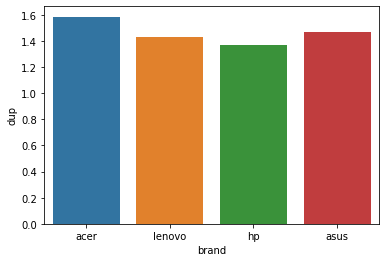

In [ ]:
sns.barplot(x='brand', y = 'dup', data = com)

# 모델

### 데이터 구성


In [373]:
con = (df['main_category']=='electronics') | (df['main_category']=='appliances') | (df['main_category']=='computers') 
df2 = df[con].drop(['event_time','user_session','category_id'], axis = 1)

In [ ]:
df2.info()

In [ ]:
df2.to_csv('df2.csv')

In [ ]:
df2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df3 = df2[df2['event_type']==3]

In [ ]:
df_ele = df3[(df3['main_category']=='electronics')]
df_app = df3[(df3['main_category']=='appliances')]
df_com = df3[(df3['main_category']=='computers')]

### user

In [5]:
df3 = pd.read_csv('/content/gdrive/MyDrive/df3.csv')

In [6]:
#유저별 이벤트 횟수, 평균 구매가, 브랜드, middle category
user_pur = df3.groupby('user_id').agg(main_category = ('main_category', lambda x : [i for i in x]),
                                   product = ('product_id', lambda x : [i for i in x]),
                                   mean_price = ('price', 'mean'),
                                   brand = ('brand', lambda x : [i for i in x]), 
                                   middle = ('middle_category', lambda x : [i for i in x]))#.count().reset_index()[['main_category', 'event_type']]

In [ ]:
user_pur

In [7]:
#이벤트 횟수 세기
main_count = []
ele = []
app = []
com = []
for i in user_pur['main_category']:
  ele_count = 0
  app_count = 0
  com_count = 0
  for x in i:
    if x == 'electronics':
      ele_count += 1
    elif x == 'appliances':
      app_count += 1
    elif x == 'computers' :
      com_count += 1
  ele.append(ele_count/len(i)*100)
  app.append(app_count/len(i)*100)
  com.append(com_count/len(i)*100)

user_pur['ele_count'] = ele
user_pur['app_count'] = app
user_pur['com_count'] = com

In [8]:
apple = []
samsung = []
other = []
for i in user_pur['brand']:
  apple_count = 0
  samsung_count = 0
  other_count = 0
  for x in i:
    if x == 'apple':
      apple_count += 1
    elif x == 'samsung':
      samsung_count += 1
    else:
      other_count += 1
  apple.append(apple_count/len(i)*100)
  samsung.append(samsung_count/len(i)*100)
  other.append(other_count/len(i)*100)

user_pur['apple_count'] = apple
user_pur['samsung_count'] = samsung
user_pur['other_count'] = other

In [9]:
user_pur

,main_category,product,mean_price,brand,middle,ele_count,app_count,com_count,apple_count,samsung_count,other_count
user_id,,,,,,,,,,,
303160429,[electronics],[5100443],340.59,[garmin],[clocks],100.0,0.0,0.0,0.0,0.0,100.0
340041246,[electronics],[2100099],339.70,[lg],[video],100.0,0.0,0.0,0.0,0.0,100.0
384989212,[appliances],[2501816],41.44,[artel],[kitchen],0.0,100.0,0.0,0.0,0.0,100.0
401021311,[electronics],[1801805],231.64,[artel],[video],100.0,0.0,0.0,0.0,0.0,100.0
403013066,"[electronics, electronics]","[1004836, 1003304]",403.58,"[samsung, apple]","[smartphone, smartphone]",100.0,0.0,0.0,50.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
566265448,[electronics],[5100736],592.01,[apple],[clocks],100.0,0.0,0.0,100.0,0.0,0.0
566267483,[computers],[9101354],5.03,[x-game],[peripherals],0.0,0.0,100.0,0.0,0.0,100.0
566270060,"[electronics, appliances]","[1004209, 2900934]",73.71,"[samsung, hansa]","[smartphone, kitchen]",50.0,50.0,0.0,0.0,50.0,50.0


In [ ]:
user_pur.to_csv('user_pur.csv')

In [374]:
df2 = df2[(df2['event_type']==1)|(df2['event_type']==2)]

In [376]:
df2.to_csv('df2.csv')

In [377]:
user1 = df2.groupby('user_id').agg(main_category = ('main_category', lambda x : [i for i in x]),
                                   product = ('product_id', lambda x : [i for i in x]),
                                   mean_price = ('price', 'mean'),
                                   brand = ('brand', lambda x : [i for i in x]), 
                                   middle = ('middle_category', lambda x : [i for i in x]))

In [ ]:
user1

In [ ]:
#이벤트 횟수 세기
main_count = []
ele = []
app = []
com = []
for i in user1['main_category']:
  ele_count = 0
  app_count = 0
  com_count = 0
  for x in i:
    if x == 'electronics':
      ele_count += 1
    elif x == 'appliances':
      app_count += 1
    elif x == 'computers' :
      com_count += 1
  ele.append(ele_count/len(i)*100)
  app.append(app_count/len(i)*100)
  com.append(com_count/len(i)*100)

user1['ele_count'] = ele
user1['app_count'] = app
user1['com_count'] = com

In [ ]:
user1.drop('main_category', axis = 1, inplace = True)

In [ ]:
user_cat = user1.reset_index()[['user_id', 'ele_count', 'app_count', 'com_count']]

In [ ]:
apple = []
samsung = []
other = []
for i in user1['brand']:
  apple_count = 0
  samsung_count = 0
  other_count = 0
  for x in i:
    if x == 'apple':
      apple_count += 1
    elif x == 'samsung':
      samsung_count += 1
    else:
      other_count += 1
  apple.append(apple_count/len(i)*100)
  samsung.append(samsung_count/len(i)*100)
  other.append(other_count/len(i)*100)

user1['apple_count'] = apple
user1['samsung_count'] = samsung
user1['other_count'] = other

In [ ]:
user1

In [ ]:
user1.reset_index(inplace = True)

In [ ]:
user1.info()

In [ ]:
user1.to_csv('user.csv')

In [ ]:
user1 = pd.read_csv('/content/gdrive/MyDrive/user.csv')

### product

In [ ]:
#구매된 아이템 찾기
df3 = df2[df2['event_type']==3]

In [ ]:
df2 = pd.read_csv('/content/gdrive/MyDrive/df2.csv')

In [ ]:
#아이템 별 이벤트 횟수, 가격
product = df3.groupby('product_id').agg(product_pur_count = ('event_type', 'count'),
                              total_profit = ('price', 'sum'))

In [ ]:
df3.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df2

In [ ]:
product

In [ ]:
product.reset_index(inplace = True)

In [ ]:
#그 외 데이터 합치기
product = pd.merge(product, df3)

In [ ]:
#중복 제거
product.drop_duplicates(['product_id'], inplace = True)

In [ ]:
product.info()

In [ ]:
product.reset_index(inplace = True)

In [ ]:
product['product_id_2'] = product['product_id']

In [ ]:
product.set_index('product_id_2', inplace = True)

In [ ]:
product.to_csv('product.csv')

In [ ]:
# bins = [0, 100, 200, 300, 500, 700, 900, 1200, 1500, 1800, 2100, 3000]
# labels = ['one', 'two', 'three', 'four', '5', '6', '7','8','9','10','11']
# product['price'] = pd.cut(product['price'], bins, right=False, labels=labels)
# product.head()

,product_id,product_pur_count,category_code,brand,price
0,1000978,12,electronics smartphone,samsung,4
12,1001588,12,electronics smartphone,meizu,2
24,1002042,3,electronics smartphone,samsung,1
27,1002062,18,electronics smartphone,samsung,1
45,1002098,13,electronics smartphone,samsung,4


In [ ]:
# product['price'] = product['price'].astype(str)

In [ ]:
import pandas as pd
product = pd.read_csv('/content/gdrive/MyDrive/product.csv')

In [ ]:
product.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
product.info()

In [ ]:
product[product['main_category']=='appliances']

In [ ]:
product.drop(['event_type', 'user_id', 'total_profit'], axis = 1, inplace = True)

In [ ]:
product

,index,product_id,product_pur_count,total_profit,event_type,category_code,brand,price,user_id,main_category,middle_category,sub_category
product_id_2,,,,,,,,,,,,
1000978,0,1000978,12,3840.13,3,electronics.smartphone,samsung,333.49,560163787,electronics,smartphone,NaN
1001588,12,1001588,12,1538.18,3,electronics.smartphone,meizu,128.30,513568790,electronics,smartphone,NaN
1002042,24,1002042,3,231.42,3,electronics.smartphone,samsung,77.14,514943394,electronics,smartphone,NaN
1002062,27,1002062,18,1723.47,3,electronics.smartphone,samsung,77.14,555316329,electronics,smartphone,NaN
1002098,45,1002098,13,4818.32,3,electronics.smartphone,samsung,370.64,555356683,electronics,smartphone,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
51600010,525856,51600010,6,71.08,3,electronics.clocks,troyka,12.84,513459370,electronics,clocks,NaN
51600011,525862,51600011,4,51.36,3,electronics.clocks,NaN,12.84,515865627,electronics,clocks,NaN
51600012,525866,51600012,4,51.36,3,electronics.clocks,NaN,12.84,522626512,electronics,clocks,NaN


In [ ]:
product_vect = product.drop(['event_type', 'user_id', 'main_category','middle_category',	'sub_category', 'total_profit'], axis = 1)

In [ ]:
product_vect

In [ ]:
product_vect['category_code'] = [i.replace('.', ' ') for i in product['category_code']]

In [ ]:
product_vect.isnull().sum()

In [ ]:
product_vect.fillna('no', inplace = True)

In [ ]:
product_vect

,product_id,product_pur_count,category_code,brand,price
0,1000978,12,electronics smartphone,samsung,333.49
12,1001588,12,electronics smartphone,meizu,128.30
24,1002042,3,electronics smartphone,samsung,77.14
27,1002062,18,electronics smartphone,samsung,77.14
45,1002098,13,electronics smartphone,samsung,370.64
...,...,...,...,...,...
525856,51600010,6,electronics clocks,troyka,12.84
525862,51600011,4,electronics clocks,no,12.84
525866,51600012,4,electronics clocks,no,12.84
525870,51600018,2,electronics clocks,no,13.62


In [ ]:
product_vect['price'] = product_vect['price'].apply(lambda x : str(int(x)))

In [ ]:
product_vect['category_brand'] = product_vect['category_code'] + ' ' +  product_vect['price']

In [ ]:
product_vect.head()

,product_id,product_pur_count,category_code,brand,price,category_brand
0,1000978,12,electronics smartphone,samsung,333,electronics smartphone 333
12,1001588,12,electronics smartphone,meizu,128,electronics smartphone 128
24,1002042,3,electronics smartphone,samsung,77,electronics smartphone 77
27,1002062,18,electronics smartphone,samsung,77,electronics smartphone 77
45,1002098,13,electronics smartphone,samsung,370,electronics smartphone 370


In [ ]:
product_vect.to_csv('product_vect.csv')

###CB 알고리즘(아이템 기반)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

product = pd.read_csv('/content/gdrive/MyDrive/product.csv')
product_vect = pd.read_csv('/content/gdrive/MyDrive/product_vect.csv')

In [ ]:
#벡터화
counter = CountVectorizer()
vect = counter.fit_transform(product_vect['category_brand'])
vect

<12174x1215 sparse matrix of type '<class 'numpy.int64'>'
	with 43901 stored elements in Compressed Sparse Row format>

In [ ]:
#코사인 유사도(item)
cos = cosine_similarity(vect, vect)

#데이터 프레임화
item_sim_df = pd.DataFrame(cos, index = product['product_id'], columns = product['product_id'])

In [ ]:
cos.shape

(12174, 12174)

In [ ]:
item_sim_df.to_csv('item_sim.csv')

### 코사인 유사도 데이터

In [ ]:
item_sim_df = pd.read_csv('/content/gdrive/MyDrive/item_sim.csv')

In [ ]:
item_sim_df.set_index('product_id', inplace = True)

In [ ]:
item_sim_df

In [ ]:
product

In [ ]:
def recommend_item(id, top = 11):
  #product_id 검색
  product.reset_index(inplace = True) 
  target = item_sim_df[f'{id}'].sort_values(ascending = False)[:top].index
  target_list = []
  for i in target:
      target_list.append(i)
  target_list.remove(id)
  
  #id리스트로 index 검색
  product.set_index('product_id',inplace = True)
  result = product.loc[target_list].sort_values('product_pur_count', ascending = False)
   

  return result[['brand','price','main_category','middle_category','sub_category']]

In [ ]:
recommend_item(1002098)

###cf 알고리즘


In [256]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
import random
%matplotlib inline

In [147]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [148]:
df3.to_csv('df3.csv')

In [ ]:
df2

In [257]:
df3 = pd.read_csv('/content/gdrive/MyDrive/df3.csv')

In [258]:
df_ele = df3[(df3['main_category']=='electronics')]
df_app = df3[(df3['main_category']=='appliances')]
df_com = df3[(df3['main_category']=='computers')]

In [155]:
rate = df3.groupby(['user_id', 'product_id']).sum()['event_type'].reset_index()

In [259]:
ele_rate = df_ele.groupby(['user_id', 'product_id']).sum()['event_type'].reset_index()
app_rate = df_app.groupby(['user_id', 'product_id']).sum()['event_type'].reset_index()
com_rate = df_com.groupby(['user_id', 'product_id']).sum()['event_type'].reset_index()

In [ ]:
app_rate_ran = app_rate.sample(frac=0.5, replace=True)

In [149]:
len(rate['product_id'].unique())

12174

In [ ]:
len(rate[:381946]['product_id'].unique()), len(app_rate['product_id'].unique()), len(com_rate['product_id'].unique())

(12174, 4838, 2638)

In [ ]:
len(rate['product_id'].unique())

12174

In [157]:
def item_cosine(df):

  #정규화
  mean = np.mean(df['event_type'])
  max = np.max(df['event_type'])
  min = np.min(df['event_type'])

  df['event_type'] = df.event_type.apply(lambda x: (x-mean)/(max-min))
  
  #피벗테이블
  piv = df.pivot_table(index=['user_id'], columns=['product_id'], values='event_type')
  piv.fillna(0,inplace = True)
  
  #압축
  piv_sparse = sp.sparse.csr_matrix(piv.values)

  #유사도 비교
  item_similarity = cosine_similarity(piv_sparse.T)
  
  #데이터 프레임
  item_sim_df = pd.DataFrame(item_similarity, index = piv.columns, columns = piv.columns)

  return item_sim_df

In [260]:
def user_cosine(df):

  #정규화
  mean = np.mean(df['event_type'])
  max = np.max(df['event_type'])
  min = np.min(df['event_type'])

  df['event_type'] = df.event_type.apply(lambda x: (x-mean)/(max-min))
  
  #피벗테이블
  piv = df.pivot_table(index=['user_id'], columns=['product_id'], values='event_type')
  piv.fillna(0,inplace = True)

  piv_sparse = sp.sparse.csr_matrix(piv.values)
  user_similarity = cosine_similarity(piv_sparse)

  user_sim_df = pd.DataFrame(user_similarity, index = piv.index, columns = piv.index)

  return user_sim_df

In [ ]:
rate.info()

In [ ]:
cos_item = item_cosine(rate)

In [ ]:
com_item = item_cosine(com_rate)

In [261]:
com_user = user_cosine(com_rate)

In [ ]:
com_user.info()

In [ ]:
com_item.to_csv('com_item.csv')
# com_user.to_csv('com_user.csv')

In [ ]:
com_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 1303049 to 45500030
Columns: 2638 entries, 1303049 to 45500030
dtypes: float64(2638)
memory usage: 53.2 MB


In [ ]:
app_item = item_cosine(app_rate)

In [ ]:
app_user = user_cosine(app_rate_ran)

In [ ]:
app_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21976 entries, 384989212 to 566236063
Columns: 21976 entries, 384989212 to 566236063
dtypes: float64(21976)
memory usage: 3.6 GB


In [ ]:
app_item.to_csv('app_item.csv')

In [ ]:
app_user.to_csv('app_user.csv')#3gb


In [ ]:
ele_item = item_cosine(ele_rate[:1000000])

In [ ]:
# ele_user = user_cosine(ele_rate)

In [ ]:
ele_user.to_csv('ele_user.csv')

In [ ]:
ele_item.to_csv('ele_item.csv')

In [ ]:
ele_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4698 entries, 1000978 to 51600020
Columns: 4698 entries, 1000978 to 51600020
dtypes: float64(4698)
memory usage: 168.6 MB


####top10

In [ ]:
ele_item

In [348]:
def item_recommend_CF1(df, pro, id, top = 11):
  #product_id 검색
  pro.reset_index(inplace = True) 
  target = df[f'{id}'].sort_values(ascending = False)[:top].index
  target_list = []
  for i in target:
      target_list.append(i)
  target_list.remove(id)
  
  #id리스트로 index 검색
  pro.set_index('product_id',inplace = True)
  result = product.loc[target_list].sort_values('product_pur_count', ascending = False)
   

  return result[['brand','price','main_category','middle_category','sub_category']]

In [ ]:
item_recommend_CF1(ele_item, product,1002062, top = 50)

###추천 시스템(popular recommend)

In [2]:
import pandas as pd 

#필요한 데이터 불러오기
ele_item = pd.read_csv('/content/gdrive/MyDrive/ele_item.csv')
app_item = pd.read_csv('/content/gdrive/MyDrive/app_item.csv')
com_item = pd.read_csv('/content/gdrive/MyDrive/com_item.csv')

In [3]:
#index 설정
ele_item.set_index('product_id', inplace = True)
app_item.set_index('product_id', inplace = True)
com_item.set_index('product_id', inplace = True)

In [4]:
#유저 정보, product 정보
product = pd.read_csv('/content/gdrive/MyDrive/product.csv')
# user_pur = pd.read_csv('/content/gdrive/MyDrive/user_pur.csv') (이거는 리스트 데이터라 불러오면 str로 변환됨 )
#index 설정
product.set_index('product_id_2', inplace = True)

In [18]:
user_pur.reset_index(inplace = True)

In [154]:
def search(id):
  x = user_pur[user_pur['user_id']== id]
  return x

def recent_item(id):
  x = user_pur[user_pur['user_id']==id]['product'].values[0][-1]
  return x

def recent_category(id):
  x = user_pur[user_pur['user_id']==id]['main_category'].values[0][-1]
  return x

def recent_brand(id):
  x = user_pur[user_pur['user_id']==id]['brand'].values[0][-1]
  return x

def recent_middle(id):
  x = user_pur[user_pur['user_id']==id]['middle'].values[0][-1]
  return x

def id_category(df):
  #가장 많은 이벤트가 있는 카테고리
  cat = df[['ele_count',	'app_count',	'com_count'	]]
  cat = cat.T
  cat.reset_index(inplace= True)
  index = cat.columns[1]
  max = cat[index].max()
  if max == 50: #최빈값 2개 이상일때
    max_cat = recent_category(id)
  else:
    max_cat = cat.loc[cat[index] == cat[index].max()]['index'].item()
  

  if max_cat == 'ele_count' or max_cat == 'electronics':
    category = 'electronics'
  elif max_cat == 'app_count'or max_cat == 'appliances':
    category = 'appliances'
  else:
    category = 'computers'


  return category

In [208]:
def ele_recommend(data):  

  #전자제품일 경우
  ele = data[['apple_count', 'samsung_count', 'other_count']]
  ele = ele.T
  ele.reset_index(inplace= True)
  index = ele.columns[1]
  max = ele[index].max()
  if max == 50: #최빈값 2개 이상
    max_brand = recent_brand(id)
  else:
    max_brand = ele.loc[ele[index] == ele[index].max()]['index'].item()

  if max_brand == 'apple_count' or max_brand == 'apple':
    brand = 'apple'
  elif max_brand == 'samsung_count' or max_brand == 'samsung':
    brand = 'samsung'
  else:
    brand = 'other'



  #중분류
  middle = data['middle']

  try:
    must_middle = statistics.mode(list(data['middle'])[0]) 
  except: #최빈값 2개 이상일때
    must_middle = recent_middle(id)

  #가격대
  price = data['mean_price']
  user_price = price.item()
  high_price = user_price + 100
  low_price = user_price - 100 
  

  #브랜드관 추천
    
  if brand == 'apple':
    #product 구분 > product_id 추출
    recommend10 = product[(product['brand']== 'apple')&
                        (product['main_category'] == 'electronics')].sort_values('product_pur_count', ascending = False).head(11)
    recommend = product[(product['brand']== 'apple')&
                        (product['main_category'] == 'electronics')].sort_values('product_pur_count', ascending = False)

  elif brand == 'samsung':
    #product 구분
    recommend10 = product[(product['brand']== 'samsung')&
                        (product['main_category'] == 'electronics')].sort_values('product_pur_count', ascending = False).head(11)
    recommend = product[(product['brand']== 'samsung')&
                        (product['main_category'] == 'electronics')].sort_values('product_pur_count', ascending = False)

  else :
    recommend10 = product[(product['brand']!= 'samsung')&
                        (product['brand']!= 'apple')&
                        (product['main_category']=='electronics')&
                        (product['middle_category'] == must_middle)&
                        (product['price'] <= high_price) & 
                        (product['price'] >= low_price) ].sort_values('product_pur_count', ascending = False).head(11)
    recommend = product[(product['brand']!= 'samsung')&
                        (product['brand']!= 'apple')&
                        (product['main_category']=='electronics')&
                        (product['middle_category'] == must_middle)&
                        (product['price'] <= high_price) & 
                        (product['price'] >= low_price) ].sort_values('product_pur_count', ascending = False)

  return recommend10[['product_id','brand', 'price', 'main_category', 'middle_category','sub_category' ]], recommend[['product_id','brand', 'price', 'main_category', 'middle_category','sub_category' ]]

In [209]:
import statistics

def app_recommend(data):  
  
  #가전 제품일 경우

  x = data['middle']
  
  try:
    must_middle = statistics.mode(list(data['middle'])[0]) 
  except: #최빈값 2개 이상일때
    must_middle = recent_middle(id)

  product[product['middle_category'] == must_middle]

  #가전 추천
  recommend10 = product[product['middle_category'] == must_middle].sort_values('product_pur_count', ascending = False).head(10)
  recommend = product[product['middle_category'] == must_middle].sort_values('product_pur_count', ascending = False)
  
  return recommend10[['product_id','brand', 'price', 'main_category', 'middle_category','sub_category' ]], recommend[['product_id','brand', 'price', 'main_category', 'middle_category' ,'sub_category']]

In [210]:
def com_recommend(data): 

 #가격대 검색  
  x = data['mean_price'] 
  user_price = x.item() 
  high_price = user_price + 100 
  low_price = user_price - 100 

  #중분류
  middle = data['middle']
  m_list = []
  for i in middle:
    m_list.append(i)
  
  
  try:
    must_middle = statistics.mode(list(data['middle'])[0])  
  except: #최빈값 2개 이상일때
    must_middle = recent_middle(id)

  
  #brand
  brand = data['brand']

  try:
    must_brand = statistics.mode(list(data['brand'])[0])   
  except:
    must_brand = recent_brand(id)
  
  #조건부 탐색
  if must_brand == 'apple':
    recommend10 = product[(product['price'] <= high_price) & 
                        (product['price'] >= low_price) & 
                        (product['middle_category'] == must_middle)].sort_values('product_pur_count', ascending = False).head(11)
    recommend = product[(product['price'] <= high_price) & 
                        (product['price'] >= low_price) & 
                        (product['middle_category'] == must_middle)].sort_values('product_pur_count', ascending = False)     
  else:
    recommend10 = product[(product['price'] <= high_price) &
                        (product['price'] >= low_price) &
                        (product['middle_category'] == must_middle)].sort_values('product_pur_count', ascending = False).head(11)
    recommend = product[(product['price'] <= high_price) &
                        (product['price'] >= low_price) &
                        (product['middle_category'] == must_middle)].sort_values('product_pur_count', ascending = False)

  return recommend10[['product_id','brand', 'price', 'main_category', 'middle_category','sub_category' ]], recommend[['product_id','brand', 'price', 'main_category', 'middle_category','sub_category' ]]

In [165]:
def item_recommend_CF(df, pro, id, top = 11):

  # 조건부 내 유사도 탐색
  inx = df.T[id].sort_values(ascending = False).index
  inx = list(inx)
  inx = list(map(int,inx))
  result = product.loc[inx]

  return result[['brand','price','main_category','middle_category','sub_category']]

In [166]:
def search_col(df):
  index = df['product_id'].values
  col = list(index)
  col = list(map(str, col))
  return col

In [220]:
def id_recommend(id):

  data = search(id)
  recent = recent_item(id)
  cat = id_category(data)


  if cat == 'electronics':
    recommend10, recommend = ele_recommend(data)
    col = search_col(recommend)
    try:
        CF_recommend = item_recommend_CF(ele_item[col], recommend, recent, top = 11)
    except:
        try:
            CF_recommend = item_recommend_CF(app_item[col], recommend, recent, top = 11)
        except:
            CF_recommend = item_recommend_CF(com_item[col], recommend, recent, top = 11)
  
  elif cat == 'appliances':
    recommend10, recommend = app_recommend(data)
    col = search_col(recommend)
    try:
        CF_recommend = item_recommend_CF(app_item[col], recommend, recent, top = 11)
    except:
        try:
            CF_recommend = item_recommend_CF(ele_item[col], recommend, recent, top = 11)
        except:
            CF_recommend = item_recommend_CF(com_item[col], recommend, recent, top = 11)
  
  else:
    recommend10, recommend = com_recommend(data)
    col = search_col(recommend)
    try:
        CF_recommend = item_recommend_CF(com_item[col], recommend, recent, top = 11)
    except:
        try:
            CF_recommend = item_recommend_CF(ele_item[col], recommend, recent, top = 11)
        except:
            CF_recommend = item_recommend_CF(app_item[col], recommend, recent, top = 11)
  

  return recommend10, CF_recommend.head(11)

In [252]:
pop,cf = id_recommend(566265448)

####precision

In [412]:
test_user = com_user.sort_values(418115333, ascending = False).head(3000).index

In [ ]:
test_user

In [381]:
user1.reset_index(inplace = True)

In [483]:
pop_test = []
cf_test = []

for i in test_user:
  try:
    #true positive
    pur = user1[user1['user_id'] == i]['product'].item()
    pur= list(set(pur))
    pop,cf = id_recommend(i)
    cf_count = 0
    for i in pur:      
      for j in cf.index[1:]: #예측
         if i==j:
           cf_count += 1
           rate =  cf_count/len(cf.index)
           cf_test.append(rate)

    pop_count = 0
    for i in pur:      
      for j in pop.index: #예측
        if i == j:
          pop_count += 1
          rate =  pop_count/len(pop.index)
          pop_test.append(rate)
  except:
    cf_test.append('err')
    pop_test.append('err')

In [494]:
#에러 삭제
for item in pop_test:
    if item == 'err':
        pop_test.remove(item)

In [497]:
#에러 삭제
for item in cf_test:
    if item == 'err':
        cf_test.remove(item)

In [499]:
len(pop_test)

4327

In [502]:
print('pop_algorithm_precision = ',np.mean(pop_test))

pop_algorithm_precision =  0.20450911271918898


In [503]:
print('cf_algorithm_precision = ',np.mean(cf_test))

cf_algorithm_precision =  0.17082594029347276
